In [ ]:
import time
while True:
    print("Alive")
    time.sleep(60)


Alive
Alive
Alive
Alive


In [3]:
import os
import subprocess
from datetime import datetime, timedelta

def get_process_start_time(pid):
    try:
        # Read system uptime
        with open("/proc/uptime", "r") as f:
            uptime_secs = float(f.readline().split()[0])

        # Get clock ticks per second (jiffies)
        hertz = os.sysconf(os.sysconf_names['SC_CLK_TCK'])

        # Read process start time (22nd field in /proc/[pid]/stat)
        with open(f"/proc/{pid}/stat", "r") as f:
            fields = f.read().split()
            start_time_jiffies = int(fields[21])

        # Convert to seconds since boot
        start_time_secs = start_time_jiffies / hertz

        # Current time - (uptime - process_start)
        boot_time = datetime.now() - timedelta(seconds=uptime_secs)
        start_time = boot_time + timedelta(seconds=start_time_secs)
        return start_time.strftime("%Y-%m-%d %H:%M:%S")
    except Exception:
        return "Unknown"

def get_suspicious_procs():
    suspicious = []
    for pid in filter(str.isdigit, os.listdir('/proc')):
        try:
            exe = os.readlink(f'/proc/{pid}/exe')
            if exe.startswith("/tmp/") or exe.startswith("/var/tmp/"):
                cmdline = open(f'/proc/{pid}/cmdline', 'rb').read().replace(b'\0', b' ').decode().strip()
                status_lines = open(f'/proc/{pid}/status').readlines()
                ppid = next((line for line in status_lines if line.startswith("PPid:")), "").split()[1]

                rss_line = next((line for line in status_lines if line.startswith("VmRSS:")), None)
                rss_kb = int(rss_line.split()[1]) if rss_line else 0
                rss_mb = round(rss_kb / 1024, 2)

                cwd = os.readlink(f'/proc/{pid}/cwd')
                start_time = get_process_start_time(pid)

                suspicious.append({
                    "pid": pid,
                    "exe": exe,
                    "cmdline": cmdline,
                    "ppid": ppid,
                    "cwd": cwd,
                    "rss_mb": rss_mb,
                    "start_time": start_time
                })
        except Exception:
            continue
    return suspicious

def get_net_connections(pid):
    try:
        result = subprocess.check_output(["ss", "-tpn"]).decode()
        return "\n".join([line for line in result.splitlines() if f"pid={pid}," in line])
    except Exception:
        return "N/A"

def analyze():
    procs = get_suspicious_procs()
    if not procs:
        print("No suspicious processes found.")
        return

    print(f"Found {len(procs)} suspicious process(es):\n")
    for proc in procs:
        print(f"PID: {proc['pid']}")
        print(f"Executable: {proc['exe']}")
        print(f"Cmdline: {proc['cmdline']}")
        print(f"Parent PID: {proc['ppid']}")
        print(f"Memory: {proc['rss_mb']} MB")
        print(f"Working Dir: {proc['cwd']}")
        print(f"Start Time: {proc['start_time']}")
        print("Network Connections:")
        print(get_net_connections(proc['pid']) or "  None")
        print("-" * 60)

if __name__ == "__main__":
    analyze()


Found 39 suspicious process(es):

PID: 486033
Executable: /tmp/1748108753450386287
Cmdline: /tmp/1748108753450386287
Parent PID: 1
Memory: 2356.05 MB
Working Dir: /home/sachin
Start Time: 2025-05-25 01:30:01
Network Connections:
ESTAB 0      0               164.52.206.39:56072           47.242.186.224:33333  users:(("174810875345038",pid=486033,fd=13))                                   
------------------------------------------------------------
PID: 489173
Executable: /var/tmp/1748108754906408431
Cmdline: /var/tmp/1748108754906408431
Parent PID: 1
Memory: 2356.04 MB
Working Dir: /home/sachin
Start Time: 2025-05-25 01:40:01
Network Connections:
ESTAB 0      0               164.52.206.39:33984           47.242.186.224:33333  users:(("174810875490640",pid=489173,fd=13))                                   
------------------------------------------------------------
PID: 505728
Executable: /tmp/1748108753450386287
Cmdline: /tmp/1748108753450386287
Parent PID: 1
Memory: 2356.04 MB
Working 

In [15]:
import pandas as pd
results1_df = pd.read_csv("slowfast_predictions_long_videos.csv")

In [16]:
results1_df["video_name"].unique()

array(['Florham Park/TSCupcake-2024-05-01-14-41.mp4',
       'Florham Park/JR-2024-10-22-08-39.mp4',
       'Florham Park/AMIncident-2024-04-10-16-19.mp4',
       'specific_long_videos/Penguins View 2-2025-03-24-10-00.mp4',
       'specific_long_videos/Maple Trees 2-2025-03-20-09-00.mp4',
       'specific_long_videos/Hallway 2-2025-03-20-14-00.mp4',
       'specific_long_videos/Oak Trees 2-2025-03-20-10-00.mp4',
       'specific_long_videos/Preschool Playground 1-2025-03-13-10-00.mp4',
       'specific_long_videos/Kangaroos View 1-2025-03-24-13-00.mp4',
       'specific_long_videos/Birch Trees 1-2025-03-20-10-00.mp4',
       'specific_long_videos/Hickory Trees 1-2025-03-20-09-00.mp4',
       'specific_long_videos/Monkeys View 1-2025-03-24-11-00.mp4',
       'specific_long_videos/Acorns 2-2025-03-25-09-00.mp4',
       'specific_long_videos/Maple Trees 1-2025-03-20-12-00.mp4',
       'specific_long_videos/Maple Trees 2-2025-03-20-15-00.mp4',
       'specific_long_videos/Kangaroos View 2-

In [18]:
!free -h

              total        used        free      shared  buff/cache   available
Mem:          105Gi        25Gi        69Gi        54Mi       9.7Gi        78Gi
Swap:            0B          0B          0B


In [14]:
results1_df.to_dict("records")

[{'video_name': 'Florham Park/TSCupcake-2024-05-01-14-41.mp4',
  'timestamp': 3.4,
  'frame_no': 31,
  'box_idx': 0,
  'detection': "[267, 135, 409, 406, 'adult']",
  'action_probs': '[    0.12873  1.5599e-05   0.0091707  5.1636e-05  9.6657e-05   0.0037842  0.00016372  0.00012808  0.00032926   0.0010007    0.026123     0.76395  7.8516e-06    0.011839  8.8923e-05  2.0684e-05     0.68437   0.0002421  4.5278e-05  0.00017415  3.2323e-05  0.00066751  0.00022884  8.1678e-05   3.982e-05  0.00015238\n   0.0002203   6.031e-06   0.0003369  5.6827e-05  2.8503e-05  8.6776e-06   4.418e-05  0.00031544  3.2573e-05   0.0056395  6.6058e-05  0.00079529  9.1432e-05  0.00011196  8.1783e-05  5.8988e-05  0.00022304  0.00014907   0.0027828  0.00059235   0.0053136  7.1319e-05  2.2066e-05  1.1575e-05  4.9713e-05  4.5728e-05\n  6.4537e-05  8.7306e-05  5.0743e-05  4.8056e-05  6.4529e-05   0.0029216     0.14442  0.00023987  0.00043138  1.7204e-05  5.5695e-05   0.0035824   0.0065157   0.0074635  0.00027813   0.001

In [9]:
results1_df = results1_df[results1_df["video_name"] != 'specific_long_videos/Hickory Trees 1-2025-03-20-09-00.mp4']

In [11]:
results1_df.to_csv("slowfast_predictions_long_videos.csv", index=False)

In [16]:
!conda init
!conda env list

no change     /home/sachin/miniconda3/condabin/conda
no change     /home/sachin/miniconda3/bin/conda
no change     /home/sachin/miniconda3/bin/conda-env
no change     /home/sachin/miniconda3/bin/activate
no change     /home/sachin/miniconda3/bin/deactivate
no change     /home/sachin/miniconda3/etc/profile.d/conda.sh
no change     /home/sachin/miniconda3/etc/fish/conf.d/conda.fish
no change     /home/sachin/miniconda3/shell/condabin/Conda.psm1
no change     /home/sachin/miniconda3/shell/condabin/conda-hook.ps1
no change     /home/sachin/miniconda3/lib/python3.12/site-packages/xontrib/conda.xsh
no change     /home/sachin/miniconda3/etc/profile.d/conda.csh
no change     /home/sachin/.bashrc
No action taken.

# conda environments:
#
base                 * /home/sachin/miniconda3
perception_models      /home/sachin/miniconda3/envs/perception_models
py310                  /home/sachin/miniconda3/envs/py310
py311                  /home/sachin/miniconda3/envs/py311
py312                  /home

In [21]:
!source /home/sachin/miniconda3/etc/profile.d/conda.sh && conda activate py39 && python3 --version

Python 3.9.21


In [22]:
!python3 --version

Python 3.12.9


In [1]:
!pwd

/workdir/sachin/temp_analysis/SlowFast_Pipelines/slowfast


In [75]:
# !wget https://dl.fbaipublicfiles.com/pyslowfast/model_zoo/ava/SLOWFAST_32x2_R101_50_50.pkl

In [87]:
!source /home/sachin/miniconda3/etc/profile.d/conda.sh && conda activate py39 && python3 tools/run_net.py --cfg ../slowfast_config_daycare_2.yaml

/home/sachin/.local/lib/python3.9/site-packages/torchvision/transforms/_functional_video.py:6: UserWarning: The 'torchvision.transforms._functional_video' module is deprecated since 0.12 and will be removed in the future. Please use the 'torchvision.transforms.functional' module instead.
  warnings.warn(
/home/sachin/.local/lib/python3.9/site-packages/torchvision/transforms/_transforms_video.py:22: UserWarning: The 'torchvision.transforms._transforms_video' module is deprecated since 0.12 and will be removed in the future. Please use the 'torchvision.transforms' module instead.
  warnings.warn(
config files: ['../slowfast_config_daycare_2.yaml']
path_to_config : ../slowfast_config_daycare_2.yaml
AUG:
  AA_TYPE: rand-m9-mstd0.5-inc1
  COLOR_JITTER: 0.4
  ENABLE: False
  GEN_MASK_LOADER: False
  INTERPOLATION: bicubic
  MASK_FRAMES: False
  MASK_RATIO: 0.0
  MASK_TUBE: False
  MASK_WINDOW_SIZE: [8, 7, 7]
  MAX_MASK_PATCHES_PER_BLOCK: None
  NUM_SAMPLE: 1
  RE_COUNT: 1
  RE_MODE: pixel
  

In [74]:
# !source /home/sachin/miniconda3/etc/profile.d/conda.sh && conda activate py39 && \
# python3 tools/run_net.py --cfg configs/AVA/c2/SLOWFAST_32x2_R101_50_50_v2.1.yaml

In [86]:
!rm -r checkpoints

In [78]:
!ls checkpoints

ls: cannot access 'checkpoints': No such file or directory


In [7]:
!pwd

/workdir/sachin/temp_analysis/SlowFast_Pipelines/slowfast


In [73]:
# !source /home/sachin/miniconda3/etc/profile.d/conda.sh && conda activate py39 && python3 tools/run_net.py --cfg ../slowfast_config_daycare.yaml

In [10]:
import pandas as pd

In [12]:
pd.read_csv("../data/daycare_fall/Secaucus_data/annotations/train_frames.csv", sep=r'\s+', engine='python')

original_vido_id  video_id  frame_id  \
0                     AaravFall-2022-02-22-13-34         0         0   
1                     AaravFall-2022-02-22-13-34         0         1   
2                     AaravFall-2022-02-22-13-34         0         2   
3                     AaravFall-2022-02-22-13-34         0         3   
4                     AaravFall-2022-02-22-13-34         0         4   
...                                          ...       ...       ...   
11968  SantaraLeiaandClairefall-2024-08-01-17-43        21      1205   
11969  SantaraLeiaandClairefall-2024-08-01-17-43        21      1206   
11970  SantaraLeiaandClairefall-2024-08-01-17-43        21      1207   
11971  SantaraLeiaandClairefall-2024-08-01-17-43        21      1208   
11972  SantaraLeiaandClairefall-2024-08-01-17-43        21      1209   

                                                    path labels  
0      AaravFall-2022-02-22-13-34/AaravFall-2022-02-2...     ""  
1      AaravFall-2022-02-22-13-34/AaravFall-2022-02-2...     ""  
2      AaravFall-2022-02-22-13-34/AaravFall-2022-02-2...     ""  
3      AaravFall-2022-02-22-13-34/AaravFall-2022-02-2...     ""  
4      AaravFall-2022-02-22-13-34/AaravFall-2022-02-2...     ""  
...                                                  ...    ...  
11968  SantaraLeiaandClairefall-2024-08-01-17-43/Sant...     ""  
11969  SantaraLeiaandClairefall-2024-08-01-17-43/Sant...     ""  
11970  SantaraLeiaandClairefall-2024-08-01-17-43/Sant...     ""  
11971  SantaraLeiaandClairefall-2024-08-01-17-43/Sant...     ""  
11972  SantaraLeiaandClairefall-2024-08-01-17-43/Sant...     ""  

[11973 rows x 5 columns]

In [89]:
import os
import cv2
import torch
import slowfast
import imutils
from imutils.video import FPS
import numpy as np
import pandas as pd
import plotly.express as px
from tqdm import tqdm
import logging
logging.basicConfig(format='%(asctime)s - p%(process)s {%(filename)s:%(lineno)d} - %(levelname)s - %(message)s')
logger = logging.getLogger()
logger.setLevel(logging.INFO)

from ultralytics import YOLO
from slowfast.config.defaults import get_cfg, assert_and_infer_cfg
from slowfast.models import build_model
from slowfast.utils.checkpoint import load_checkpoint
from slowfast.utils.parser import load_config, parse_args
from slowfast.utils.misc import launch_job
from slowfast.visualization.utils import process_cv2_inputs
from slowfast.visualization.demo_loader import ThreadVideoManager, VideoManager
from slowfast.visualization.predictor import ActionPredictor
from slowfast.visualization.video_visualizer import VideoVisualizer
import slowfast.utils.misc as misc
from slowfast.datasets import loader
from slowfast.datasets.utils import get_sequence
from slowfast.datasets.cv2_transform import scale, scale_boxes

from torchvision.transforms import Compose, Lambda
from torchvision.transforms._transforms_video import (
    CenterCropVideo,
    NormalizeVideo,
)
from pytorchvideo.data.encoded_video import EncodedVideo
from pytorchvideo.transforms import (
    ApplyTransformToKey,
    ShortSideScale,
    UniformTemporalSubsample,
    UniformCropVideo
)

In [90]:
import sys
sys.path.append("tools")
from slowfast.config.defaults import assert_and_infer_cfg
from slowfast.utils.misc import launch_job
from slowfast.utils.parser import load_config, parse_args
from demo_net import demo
from test_net import test
from train_net import train
from visualization import visualize

In [92]:
ava_classes = ['bend/bow (at the waist)','crawl','crouch/kneel','dance','fall down',
 'get up','jump/leap','lie/sleep','martial art','run/jog','sit','stand','swim','walk',
 'answer phone','brush teeth','carry/hold (an object)','catch (an object)','chop','climb (e.g., a mountain)',
 'clink glass','close (e.g., a door, a box)','cook','cut','dig','dress/put on clothing','drink',
 'drive (e.g., a car, a truck)','eat','enter','exit','extract','fishing','hit (an object)','kick (an object)',
 'lift/pick up','listen (e.g., to music)','open (e.g., a window, a car door)','paint','play board game',
 'play musical instrument','play with pets','point to (an object)','press','pull (an object)',
 'push (an object)','put down','read','ride (e.g., a bike, a car, a horse)','row boat','sail boat','shoot',
 'shovel','smoke','stir','take a photo','text on/look at a cellphone','throw','touch (an object)',
 'turn (e.g., a screwdriver)','watch (e.g., TV)','work on a computer','write','fight/hit (a person)',
 'give/serve (an object) to (a person)','grab (a person)','hand clap','hand shake', 'hand wave',
 'hug (a person)','kick (a person)','kiss (a person)','lift (a person)','listen to (a person)',
 'play with kids','push (another person)','sing to (e.g., self, a person, a group)',
 'take (an object) from (a person)','talk to (e.g., self, a person, a group)','watch (a person)']

action_class_list = ['fall',
 'standing',
 'sitting',
 'walking',
 'crawling',
 'sleeping',
 'eating',
 'jumping',
 'others']

In [95]:
len(ava_classes), len(action_class_list)

(80, 9)

In [97]:
class Config:
    def __init__(self, shard_id=0, num_shards=1, init_method="tcp://localhost:9999", cfg_files=None, opts=None):
        self.shard_id = shard_id
        self.num_shards = num_shards
        self.init_method = init_method
        self.cfg_files = cfg_files if cfg_files is not None else ["configs/Kinetics/SLOWFAST_4x16_R50.yaml"]
        self.opts = opts #if opts is not None else []

    def update(self, shard_id=None, num_shards=None, init_method=None, cfg_files=None, opts=None):
        if shard_id is not None:
            self.shard_id = shard_id
        if num_shards is not None:
            self.num_shards = num_shards
        if init_method is not None:
            self.init_method = init_method
        if cfg_files is not None:
            self.cfg_files = cfg_files
        if opts is not None:
            self.opts = opts

    def display(self):
        print("Configuration:")
        print(f"  Shard ID: {self.shard_id}")
        print(f"  Number of Shards: {self.num_shards}")
        print(f"  Initialization Method: {self.init_method}")
        print(f"  Configuration Files: {self.cfg_files}")
        print(f"  Additional Options: {self.opts}")

parse_config = Config()
parse_config.display()
args = parse_config

# cfg = load_config(args, "../slowfast_config_daycare_2.yaml")
# cfg.TEST.CHECKPOINT_FILE_PATH = "checkpoints/checkpoint_epoch_00050.pyth"
cfg = load_config(args, "configs/AVA/c2/SLOWFAST_32x2_R101_50_50_v2.1.yaml")
cfg.TEST.CHECKPOINT_FILE_PATH = "SLOWFAST_32x2_R101_50_50.pkl"
cfg.NUM_GPUS = 1
cfg.DETECTION.ENABLE = True
cfg.TEST.NUM_TEMPORAL_CLIPS = [cfg.TEST.NUM_ENSEMBLE_VIEWS]
cfg = assert_and_infer_cfg(cfg)
action_model = build_model(cfg)
action_model.eval()

import slowfast.utils.checkpoint as cu
import slowfast.utils.distributed as du
# Set up environment.
du.init_distributed_training(cfg)
# Set random seed from configs.
np.random.seed(cfg.RNG_SEED)
torch.manual_seed(cfg.RNG_SEED)

flops, params = misc.log_model_info(action_model, cfg, use_train_input=False)
cu.load_test_checkpoint(cfg, action_model)



Configuration:
  Shard ID: 0
  Number of Shards: 1
  Initialization Method: tcp://localhost:9999
  Configuration Files: ['configs/Kinetics/SLOWFAST_4x16_R50.yaml']
  Additional Options: None
path_to_config : configs/AVA/c2/SLOWFAST_32x2_R101_50_50_v2.1.yaml


2025-05-16 19:10:09,008 - p4032921 {misc.py:186} - INFO - Model:
SlowFast(
  (s1): VideoModelStem(
    (pathway0_stem): ResNetBasicStem(
      (conv): Conv3d(3, 64, kernel_size=(1, 7, 7), stride=(1, 2, 2), padding=(0, 3, 3), bias=False)
      (bn): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (pool_layer): MaxPool3d(kernel_size=[1, 3, 3], stride=[1, 2, 2], padding=[0, 1, 1], dilation=1, ceil_mode=False)
    )
    (pathway1_stem): ResNetBasicStem(
      (conv): Conv3d(3, 8, kernel_size=(5, 7, 7), stride=(1, 2, 2), padding=(2, 3, 3), bias=False)
      (bn): BatchNorm3d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (pool_layer): MaxPool3d(kernel_size=[1, 3, 3], stride=[1, 2, 2], padding=[0, 1, 1], dilation=1, ceil_mode=False)
    )
  )
  (s1_fuse): FuseFastToSlow(
    (conv_f2s): Conv3d(8, 16, kernel_size=(5, 1, 1), stride=(4, 1, 1), padding=(2, 0, 0), bias

Fri May 16 19:10:11 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 565.57.01              Driver Version: 565.57.01      CUDA Version: 12.7     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-PCIE-40GB          On  |   00000000:01:01.0 Off |                    0 |
| N/A   36C    P0             60W /  250W |    7575MiB /  40960MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

2025-05-16 19:10:11,532 - p4032921 {checkpoint.py:213} - INFO - Loading network weights from SLOWFAST_32x2_R101_50_50.pkl.


missing keys: []
unexpected keys: []


In [11]:
train_loader = loader.construct_loader(cfg, "train")

2025-05-16 10:27:23,512 - p4032921 {ava_helper.py:59} - INFO - Finished loading image paths from: ../data/daycare_fall/Secaucus_data/annotations/train_frames.csv


ann_filenames : ['../data/daycare_fall/Secaucus_data/annotations/train_labels.csv']
ann_is_gt_box : [True]
detect_thresh : 0.8
boxes_sample_rate : 1


2025-05-16 10:28:24,702 - p4032921 {ava_helper.py:104} - INFO - Finished loading annotations from: ../data/daycare_fall/Secaucus_data/annotations/train_labels.csv
2025-05-16 10:28:24,703 - p4032921 {ava_helper.py:105} - INFO - Detection threshold: 0.8
2025-05-16 10:28:24,703 - p4032921 {ava_helper.py:106} - INFO - Number of unique boxes: 541
2025-05-16 10:28:24,704 - p4032921 {ava_helper.py:107} - INFO - Number of annotations: 542


n_rows : 542
count : 542
n_det_thresh_filtered : 0
n_sample_rate_filtered : 0


2025-05-16 10:29:09,082 - p4032921 {ava_helper.py:164} - INFO - 110 keyframes used.
2025-05-16 10:29:09,083 - p4032921 {ava_dataset.py:89} - INFO - === AVA dataset summary ===
2025-05-16 10:29:09,083 - p4032921 {ava_dataset.py:90} - INFO - Split: train
2025-05-16 10:29:09,084 - p4032921 {ava_dataset.py:91} - INFO - Number of videos: 18
2025-05-16 10:29:09,084 - p4032921 {ava_dataset.py:95} - INFO - Number of frames: 11973
2025-05-16 10:29:09,084 - p4032921 {ava_dataset.py:96} - INFO - Number of key frames: 110
2025-05-16 10:29:09,085 - p4032921 {ava_dataset.py:97} - INFO - Number of boxes: 541.


count : 110
n_cnt : 180000018
n_not_valid_frame_filtered : 0
n_no_labels_in_sec : 179999908


In [12]:
test_loader = loader.construct_loader(cfg, "test")

2025-05-16 10:29:13,708 - p4032921 {ava_helper.py:59} - INFO - Finished loading image paths from: ../data/daycare_fall/Secaucus_data/annotations/eval_frames.csv


ann_filenames : ['../data/daycare_fall/Secaucus_data/annotations/val_labels.csv']
ann_is_gt_box : [False]
detect_thresh : 0.8
boxes_sample_rate : 1


2025-05-16 10:29:30,758 - p4032921 {ava_helper.py:104} - INFO - Finished loading annotations from: ../data/daycare_fall/Secaucus_data/annotations/val_labels.csv
2025-05-16 10:29:30,758 - p4032921 {ava_helper.py:105} - INFO - Detection threshold: 0.8
2025-05-16 10:29:30,759 - p4032921 {ava_helper.py:106} - INFO - Number of unique boxes: 219
2025-05-16 10:29:30,759 - p4032921 {ava_helper.py:107} - INFO - Number of annotations: 219


n_rows : 219
count : 219
n_det_thresh_filtered : 0
n_sample_rate_filtered : 0


2025-05-16 10:29:43,181 - p4032921 {ava_helper.py:164} - INFO - 28 keyframes used.
2025-05-16 10:29:43,182 - p4032921 {ava_dataset.py:89} - INFO - === AVA dataset summary ===
2025-05-16 10:29:43,182 - p4032921 {ava_dataset.py:90} - INFO - Split: test
2025-05-16 10:29:43,183 - p4032921 {ava_dataset.py:91} - INFO - Number of videos: 5
2025-05-16 10:29:43,183 - p4032921 {ava_dataset.py:95} - INFO - Number of frames: 41367
2025-05-16 10:29:43,183 - p4032921 {ava_dataset.py:96} - INFO - Number of key frames: 28
2025-05-16 10:29:43,184 - p4032921 {ava_dataset.py:97} - INFO - Number of boxes: 219.


count : 28
n_cnt : 50000005
n_not_valid_frame_filtered : 0
n_no_labels_in_sec : 49999977


In [31]:
from sklearn.metrics import average_precision_score
from slowfast.utils.ava_eval_helper import (
    evaluate_ava,
    read_csv,
    read_exclusions,
    read_labelmap,
)
import slowfast.datasets.ava_helper as ava_helper
from collections import defaultdict, deque
import pprint, collections

In [32]:
mode = "test"
_, video_idx_to_name = ava_helper.load_image_lists(cfg, mode == "train")

2025-05-16 10:35:37,613 - p4032921 {ava_helper.py:59} - INFO - Finished loading image paths from: ../data/daycare_fall/Secaucus_data/annotations/eval_frames.csv


In [33]:
video_idx_to_name

['DanielleTable-2021-09-03-16-10',
 'Easton-2022-08-24-16-58',
 'Jack-ActivityExclusion-2022-07-14-15-30',
 'Jenine-gigi-2020-01-10-15-03',
 'Teachersattimeofincident-2022-08-26-17-08']

In [34]:
categories, class_whitelist = read_labelmap(
            os.path.join(cfg.AVA.ANNOTATION_DIR, cfg.AVA.LABEL_MAP_FILE)
        )
categories, class_whitelist

([{'id': 1, 'name': 'fall'},
  {'id': 2, 'name': 'standing'},
  {'id': 3, 'name': 'sitting'},
  {'id': 4, 'name': 'walking'},
  {'id': 5, 'name': 'crawling'},
  {'id': 6, 'name': 'sleeping'},
  {'id': 7, 'name': 'eating'},
  {'id': 8, 'name': 'jumping'},
  {'id': 9, 'name': 'others'}],
 {1, 2, 3, 4, 5, 6, 7, 8, 9})

In [40]:
gt_filename

'../data/daycare_fall/Secaucus_data/annotations/val_labels.csv'

In [83]:
val_df = pd.read_csv('../data/daycare_fall/Secaucus_data/annotations/train_labels.csv')
val_df.columns = ["video_id", "timestamp", "xmin", "ymin", "xmax", "ymax", "class_id"]
val_df["class_id"].value_counts()

class_id
3    429
2    406
4     79
1     71
5     56
9     21
7     21
8      2
Name: count, dtype: int64

In [84]:
val_df = pd.read_csv(gt_filename)
val_df.columns = ["video_id", "timestamp", "xmin", "ymin", "xmax", "ymax", "class_id", "conf"]
val_df

video_id  timestamp     xmin     ymin  \
0               DanielleTable-2021-09-03-16-10          5  0.12422  0.36667   
1               DanielleTable-2021-09-03-16-10          5  0.31250  0.28889   
2               DanielleTable-2021-09-03-16-10          5  0.52812  0.91111   
3               DanielleTable-2021-09-03-16-10          5  0.43828  0.16667   
4               DanielleTable-2021-09-03-16-10          5  0.16328  0.28611   
..                                         ...        ...      ...      ...   
213               Jenine-gigi-2020-01-10-15-03        175  0.84062  0.42778   
214  Teachersattimeofincident-2022-08-26-17-08          8  0.95703  0.59861   
215  Teachersattimeofincident-2022-08-26-17-08         10  0.93750  0.57639   
216  Teachersattimeofincident-2022-08-26-17-08         11  0.94453  0.60417   
217  Teachersattimeofincident-2022-08-26-17-08         12  0.95391  0.62639   

        xmax     ymax  class_id  conf  
0    0.18672  0.50278         3   1.0  
1    0.36094  0.41528         3   1.0  
2    0.59766  0.99722         3   1.0  
3    0.48906  0.37500         2   1.0  
4    0.20781  0.41806         3   1.0  
..       ...      ...       ...   ...  
213  0.90859  0.53194         3   1.0  
214  0.99922  0.75972         2   1.0  
215  0.98750  0.75833         1   1.0  
216  0.97891  0.72500         1   1.0  
217  0.98828  0.70417         1   1.0  

[218 rows x 8 columns]

In [405]:
val_df["class_id"].value_counts()

class_id
2    100
3     73
6     25
1     12
5      8
Name: count, dtype: int64

In [44]:
gt_filename = os.path.join(cfg.AVA.ANNOTATION_DIR, cfg.AVA.GROUNDTRUTH_FILE)
full_groundtruth = read_csv(gt_filename, class_whitelist)

In [45]:
len(full_groundtruth)

3

In [46]:
full_groundtruth[0].keys()

dict_keys(['DanielleTable-2021-09-03-16-10,0005', 'DanielleTable-2021-09-03-16-10,0006', 'DanielleTable-2021-09-03-16-10,0007', 'DanielleTable-2021-09-03-16-10,0008', 'DanielleTable-2021-09-03-16-10,0009', 'DanielleTable-2021-09-03-16-10,0010', 'Easton-2022-08-24-16-58,0004', 'Easton-2022-08-24-16-58,0005', 'Easton-2022-08-24-16-58,0006', 'Easton-2022-08-24-16-58,0007', 'Easton-2022-08-24-16-58,0008', 'Easton-2022-08-24-16-58,0009', 'Jack-ActivityExclusion-2022-07-14-15-30,0924', 'Jack-ActivityExclusion-2022-07-14-15-30,0925', 'Jack-ActivityExclusion-2022-07-14-15-30,0926', 'Jack-ActivityExclusion-2022-07-14-15-30,0927', 'Jack-ActivityExclusion-2022-07-14-15-30,0928', 'Jack-ActivityExclusion-2022-07-14-15-30,0929', 'Jenine-gigi-2020-01-10-15-03,0170', 'Jenine-gigi-2020-01-10-15-03,0171', 'Jenine-gigi-2020-01-10-15-03,0172', 'Jenine-gigi-2020-01-10-15-03,0173', 'Jenine-gigi-2020-01-10-15-03,0174', 'Jenine-gigi-2020-01-10-15-03,0175', 'Teachersattimeofincident-2022-08-26-17-08,0008', 'Te

In [47]:
full_groundtruth[0]["DanielleTable-2021-09-03-16-10,0005"]

[[0.15, 0.51484, 0.34167, 0.58281],
 [0.36667, 0.12422, 0.50278, 0.18672],
 [0.28889, 0.3125, 0.41528, 0.36094],
 [0.91111, 0.52812, 0.99722, 0.59766],
 [0.16667, 0.43828, 0.375, 0.48906],
 [0.28611, 0.16328, 0.41806, 0.20781],
 [0.1375, 0.36016, 0.26806, 0.40469],
 [0.24444, 0.24375, 0.36389, 0.30156],
 [0.08333, 0.3625, 0.1875, 0.40859],
 [0.19722, 0.20312, 0.35833, 0.25156]]

In [49]:
pwd

'/workdir/sachin/temp_analysis/SlowFast_Pipelines/slowfast'

In [50]:
from ava_evaluation import np_box_list, np_box_list_ops, np_box_mask_list, np_box_mask_list_ops, label_map_util, metrics, per_image_evaluation, standard_fields

In [53]:
excluded_keys = read_exclusions(
            os.path.join(cfg.AVA.ANNOTATION_DIR, cfg.AVA.EXCLUSION_FILE)
        )

ObjectDetectionEvalMetrics = collections.namedtuple(
    "ObjectDetectionEvalMetrics",
    [
        "average_precisions",
        "mean_ap",
        "precisions",
        "recalls",
        "corlocs",
        "mean_corloc",
    ],
)

results = run_evaluation(categories, full_groundtruth, detections, excluded_keys)

2025-05-16 11:04:56,302 - p4032921 {1851279173.py:304} - INFO - The following classes have no ground truth examples: [4 7 8 9]


Initialized run_evaluation
Initialized ObjectDetectionEvaluator
Initialized ObjectDetectionEvaluation
Initialized PerImageEvaluation

self.scores_per_class[0] : 28, [10, 10, 10, 10, 10, 10, 3, 3, 4, 4, 4, 4, 12, 14, 12, 13, 14, 14, 9, 9, 9, 9, 9, 9, 1, 1, 1, 1]
scores : [    0.45556     0.50312     0.47071     0.47466     0.51056     0.47747     0.50178      0.4362     0.50857      0.4432     0.45632     0.46915     0.50328     0.47282     0.46887     0.47873     0.50264     0.43687      0.4995      0.4445     0.46679     0.45552     0.46935     0.47423     0.49799     0.50461
     0.43768     0.47949     0.44611     0.50136     0.47378     0.45567     0.47396      0.5024     0.47125      0.4329     0.49074     0.50198     0.50388     0.44313     0.45493     0.47408     0.46739     0.50177     0.47481     0.48541     0.43527     0.44208     0.50342     0.50294     0.46807     0.46852
     0.50288     0.47453     0.44237     0.48382     0.43659     0.46163      0.5044     0.50327     0.

In [54]:
scores = '''[    0.45556     0.50312     0.47071     0.47466     0.51056     0.47747     0.50178      0.4362     0.50857      0.4432     0.45632     0.46915     0.50328     0.47282     0.46887     0.47873     0.50264     0.43687      0.4995      0.4445     0.46679     0.45552     0.46935     0.47423     0.49799     0.50461
     0.43768     0.47949     0.44611     0.50136     0.47378     0.45567     0.47396      0.5024     0.47125      0.4329     0.49074     0.50198     0.50388     0.44313     0.45493     0.47408     0.46739     0.50177     0.47481     0.48541     0.43527     0.44208     0.50342     0.50294     0.46807     0.46852
     0.50288     0.47453     0.44237     0.48382     0.43659     0.46163      0.5044     0.50327     0.39731     0.47802     0.49242     0.40126     0.48106     0.46319     0.39986     0.46639     0.47084     0.49017     0.40213     0.45707     0.46339     0.48971     0.40173       0.462     0.49636     0.47093
     0.45807     0.39963     0.46673     0.49415     0.52069     0.50946     0.45806     0.56966     0.43602     0.45644     0.53921     0.49233      0.4899     0.49264     0.51686     0.50478     0.53632     0.53436     0.55362     0.53612     0.50058     0.56141     0.51156     0.41704     0.52622     0.50498
     0.49869     0.51442     0.51464     0.50368     0.55171     0.52711     0.53982     0.51724     0.52012     0.56377     0.58659      0.5199     0.56052     0.48471     0.53665     0.53293     0.49849     0.51895     0.52821     0.48636      0.5014     0.54816      0.4336     0.53136     0.50214      0.5381
      0.4791     0.52313     0.55062     0.49937     0.52886     0.52049     0.54529     0.51244     0.47305     0.51121      0.5144     0.54427     0.53964     0.50201     0.51159     0.51857     0.52637     0.45284     0.52362     0.50056       0.485     0.52276     0.49771     0.49877     0.51959     0.49916
     0.54223     0.50263     0.49383     0.47772     0.51327     0.48426     0.43774     0.49717     0.47458     0.48419     0.45821     0.48831     0.52259     0.48787     0.48308       0.437     0.47511     0.48495     0.49659     0.48753     0.45821     0.52398     0.48779     0.48293     0.43944     0.47954
     0.48562     0.49614     0.48713     0.45821     0.52398     0.48764     0.47968     0.43439     0.48575     0.49658     0.48601     0.45825     0.52369     0.48252     0.48827     0.49671     0.48488     0.43653     0.48058     0.48514     0.48357     0.45785     0.52275     0.48845     0.47544     0.49676
     0.43576     0.48624     0.48282     0.48402     0.52435      0.4586     0.48854     0.48049     0.48595     0.49133     0.48471]'''

labels = '''[False False False False False False False False False False False False False False False False False False False False  True False False False False False False False False False  True False False False False False False False False False False False False False False False False False False False False False False
 False False False False False False False False False False False False False False False False  True False False False  True False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False
 False False False False False False False False False False False  True False False False False False False False False False False False False  True False False False False False False False False False False False False False False False False False False False False False False False False False False False False
 False False False False False False False False False False False False False False False False False False False False  True False False False False False False False False False False False False False False False  True False False False False False  True False False False False False False False False False False
 False False False False  True  True  True]'''

scores = np.array([float(x) for x in scores.replace("[", "").replace("]", "").split()])
labels = np.array([x == "True" for x in labels.replace("[", "").replace("]", "").split()])
len(scores), len(labels), sum(labels)

(219, 219, 12)

In [55]:
sorted_indices = np.argsort(scores)[::-1]
sorted_indices

array([114,  85, 113,  99, 116,  96, 108, 132, 125, 136, 141, 156, 110, 142,  88, 129, 118,  94,  97,  95, 119, 127, 134, 122, 109, 146, 102, 212, 186, 177, 194, 148, 131, 151, 204, 168,  82, 135, 112, 115, 154, 121, 145, 111,  92, 106, 105, 140, 160, 137, 144, 100, 139,   4,  83,   8, 103,  93,  25,  58,  38, 107,
        48,  12,  59,   1,  49,  52,  16, 157,  33, 128, 143,  37,   6,  43, 124,  29,  98, 149,  18, 133, 155, 153, 104, 120,  24, 152, 163, 207, 197, 174, 191,  76, 183,  81, 158,  91,  62,  89, 217,  36,  69,  90,  73, 214, 205, 167, 196, 169, 178, 187, 175, 184, 123, 209, 192, 216, 190, 182,  45, 201, 150, 173,
       198, 218, 117, 161, 165, 211,  55, 202, 170, 179, 210, 195,  64, 200, 215, 188, 181,  27, 130,  15,  61, 159,   5, 206, 172,  44,   3, 164,  53,  23,  41,  32,  30, 138,  13,  34,  77,  68,   2,  22,  11,  14,  51,  50,  42,  20,  80,  67,  72,  65,  75,  57, 213, 193, 185, 176, 166,  78,  84, 203,  71,  87,
        10,  31,   0,  21,  40, 147,  28,  19,   

In [56]:
labels.astype(int)[sorted_indices]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [57]:
1-labels.astype(int)[sorted_indices]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [58]:
np.cumsum(labels.astype(int)[sorted_indices])

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  5,  5,  5,  5,  6,  7,  7,  7,  7,  7,  7,  7,  8,  8,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12])

In [59]:
np.cumsum(1-labels.astype(int)[sorted_indices])

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,
        63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 100, 101, 101, 102, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 114, 115, 116, 117, 117, 118, 119,
       120, 120, 120, 121, 122, 123, 124, 125, 126, 126, 127, 127, 128, 129, 130, 131, 132, 133, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174,
       175, 176, 177, 178, 179, 180, 181, 182, 18

In [61]:
scores[sorted_indices]

array([    0.58659,     0.56966,     0.56377,     0.56141,     0.56052,     0.55362,     0.55171,     0.55062,     0.54816,     0.54529,     0.54427,     0.54223,     0.53982,     0.53964,     0.53921,      0.5381,     0.53665,     0.53632,     0.53612,     0.53436,     0.53293,     0.53136,     0.52886,     0.52821,
           0.52711,     0.52637,     0.52622,     0.52435,     0.52398,     0.52398,     0.52369,     0.52362,     0.52313,     0.52276,     0.52275,     0.52259,     0.52069,     0.52049,     0.52012,      0.5199,     0.51959,     0.51895,     0.51857,     0.51724,     0.51686,     0.51464,     0.51442,      0.5144,
           0.51327,     0.51244,     0.51159,     0.51156,     0.51121,     0.51056,     0.50946,     0.50857,     0.50498,     0.50478,     0.50461,      0.5044,     0.50388,     0.50368,     0.50342,     0.50328,     0.50327,     0.50312,     0.50294,     0.50288,     0.50264,     0.50263,      0.5024,     0.50214,
           0.50201,     0.50198,     0.5017

In [62]:
precision = np.cumsum(labels.astype(int)[sorted_indices]) / (np.cumsum(labels.astype(int)[sorted_indices]) + np.cumsum(1-labels.astype(int)[sorted_indices]))
precision

array([          0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,
                 0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,
                 0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,
                 0,           0,           

In [69]:
recall = np.cumsum(labels.astype(int)[sorted_indices]) / sum(labels)
recall

array([          0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,
                 0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,
                 0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,           0,
                 0,           0,           

In [70]:
import plotly.graph_objects as go

def plot_multiline_chart(X, Y, legends=None, title="Multi-line Plot", x_label="X Axis", y_label="Y Axis"):
    """
    Plots a multi-line chart using Plotly with custom legends and hover tooltips.

    Parameters:
    - X: 1D list or array for the x-axis.
    - Y: 2D list or array-like where each sublist is a line on the chart.
    - legends: List of legend labels for each line. If None, defaults to 'Series 1', 'Series 2', etc.
    - title: Title of the chart.
    - x_label: Label for the x-axis.
    - y_label: Label for the y-axis.
    """
    fig = go.Figure()

    num_series = len(Y)
    if legends is None or len(legends) != num_series:
        legends = [f"Series {i + 1}" for i in range(num_series)]

    for idx, y_series in enumerate(Y):
        fig.add_trace(go.Scatter(
            x=X,
            y=y_series,
            mode='lines+markers',
            name=legends[idx],
            hovertemplate='X: %{x}<br>Y: %{y}<extra></extra>'
        ))

    fig.update_layout(
        title=title,
        xaxis_title=x_label,
        yaxis_title=y_label,
        legend_title="Legend",
        template="plotly_white",
        hovermode="x unified"
    )

    fig.show()


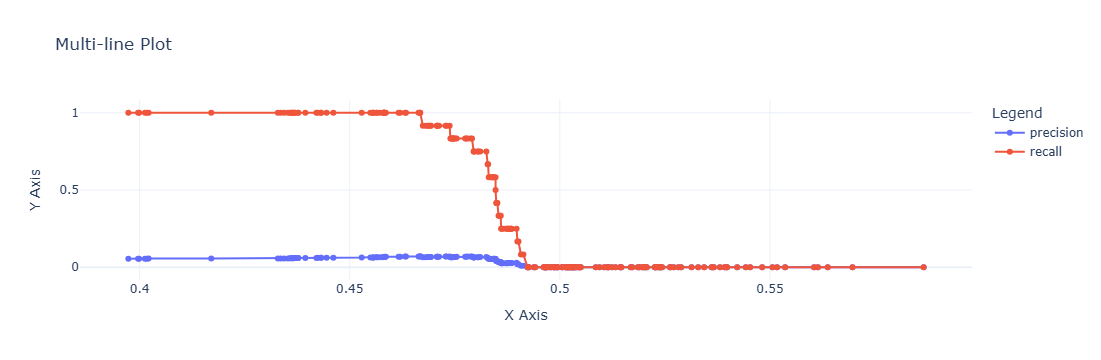

In [71]:
plot_multiline_chart(scores[sorted_indices], [precision, recall], legends = ["precision", "recall"],
                     title="Multi-line Plot", x_label="X Axis", y_label="Y Axis")

In [353]:

sorted_indices = np.argsort(scores)
sorted_indices = sorted_indices[::-1]
labels = labels.astype(int)
true_positive_labels = labels[sorted_indices]
false_positive_labels = 1 - true_positive_labels
cum_true_positives = np.cumsum(true_positive_labels)
cum_false_positives = np.cumsum(false_positive_labels)
precision = cum_true_positives.astype(float) / (
    cum_true_positives + cum_false_positives
)
recall = cum_true_positives.astype(float) / sum(labels)

In [354]:
precision

array([          1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,           1,
                 1,           1,           1,     0.96429,     0.93103,         0.9,     0.87097,       0.875,     0.87879,     0.88235,     0.85714,     0.83333,     0.83784,     0.84211,     0.84615,        0.85,     0.85366,     0.85714,     0.86047,     0.86364,     0.86667,     0.86957,     0.87234,       0.875,
           0.87755,        0.88,     0.88235,     0.88462,     0.88679,     0.88889,     0.89091,       0.875,     0.87719,     0.87931,     0.86441,        0.85,     0.83607,     0.83871,      0.8254,      0.8125,         0.8,     0.78788,     0.77612,     0.76471,     0.75362,     0.75714,     0.74648,        0.75,
           0.73973,     0.74324,     0.7333

In [330]:
z = '''[False False False False  True False False False False False False False False False  True False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False
 False False False False False False False  True  True  True  True  True  True  True  True  True False  True  True  True False  True  True  True  True  True  True  True  True  True  True  True  True  True  True  True  True  True  True  True  True  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True False  True  True  True  True  True  True  True  True  True  True  True  True False  True  True  True  True  True  True  True  True  True  True  True  True  True  True  True  True  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False
 False False False  True False False False]'''.split(" ")
len(z), len([x for x in z if "True" in x]), len([x for x in z if "False" in x])

(319, 100, 119)

In [332]:
z = '''[ True  True  True  True False  True  True  True  True  True  True  True  True  True False  True  True  True  True  True False  True  True  True  True  True  True  True  True  True False  True  True  True  True  True  True  True  True  True  True  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False
 False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False False
 False False False False  True  True False False False False  True False False  True False  True False False False  True False False  True False  True False False False  True  True False False  True False False False False  True  True False False  True False False False False  True  True  True False False False False
 False False  True False False False False]'''.split(" ")
len(z), len([x for x in z if "True" in x]), len([x for x in z if "False" in x])

(293, 74, 145)

In [334]:
100 + 119

219

In [333]:
145 + 74

219

In [286]:
results

{'PascalBoxes_Precision/mAP@0.5IOU': 0.4824259593399096,
 'PascalBoxes_PerformanceByCategory/AP@0.5IOU/fall': 0.7721366670072463,
 'PascalBoxes_PerformanceByCategory/AP@0.5IOU/standing': 0.377742651002014,
 'PascalBoxes_PerformanceByCategory/AP@0.5IOU/sitting': nan,
 'PascalBoxes_PerformanceByCategory/AP@0.5IOU/walking': 0.19486531986531985,
 'PascalBoxes_PerformanceByCategory/AP@0.5IOU/crawling': 0.5849591994850586,
 'PascalBoxes_PerformanceByCategory/AP@0.5IOU/sleeping': nan,
 'PascalBoxes_PerformanceByCategory/AP@0.5IOU/eating': nan,
 'PascalBoxes_PerformanceByCategory/AP@0.5IOU/jumping': nan,
 'PascalBoxes_PerformanceByCategory/AP@0.5IOU/others': nan}

In [383]:
full_groundtruth[1]

defaultdict(list,
            {'DanielleTable-2021-09-03-16-10,0005': [2,
              2,
              2,
              2,
              1,
              2,
              2,
              2,
              2,
              2],
             'DanielleTable-2021-09-03-16-10,0006': [2,
              2,
              2,
              2,
              1,
              2,
              2,
              2,
              2,
              2],
             'DanielleTable-2021-09-03-16-10,0007': [2,
              2,
              2,
              2,
              2,
              2,
              2,
              2,
              2],
             'DanielleTable-2021-09-03-16-10,0008': [2,
              2,
              2,
              2,
              2,
              2,
              2,
              2,
              2],
             'DanielleTable-2021-09-03-16-10,0009': [2,
              2,
              2,
              2,
              2,
              2,
              2,
              2,
 

In [387]:
np.unique(np.concatenate([full_groundtruth[1][x] for x in full_groundtruth[1]]), return_counts=True)

(array([          1,           2,           4,           5]),
 array([100,  74,   8,  25]))

In [311]:
np.unique(np.concatenate([full_groundtruth[1][x] for x in full_groundtruth[1]]))

array([          1,           2,           4,           5])

In [303]:
[len(full_groundtruth[1][x]) for x in full_groundtruth[1]], len([len(full_groundtruth[1][x]) for x in full_groundtruth[1]])

([10,
  10,
  9,
  9,
  10,
  10,
  3,
  3,
  3,
  3,
  4,
  4,
  12,
  14,
  11,
  12,
  14,
  14,
  9,
  9,
  8,
  8,
  8,
  9,
  1,
  0],
 26)

In [306]:
[len(detections[1][x]) for x in detections[1]], len([len(detections[1][x]) for x in detections[1]])

([90,
  90,
  90,
  90,
  90,
  90,
  27,
  27,
  36,
  36,
  36,
  36,
  108,
  126,
  108,
  117,
  126,
  126,
  81,
  81,
  81,
  81,
  81,
  81,
  9,
  9,
  9,
  9,
  0],
 29)

In [284]:
full_groundtruth[1]['DanielleTable-2021-09-03-16-10,0005']

[2, 2, 2, 2, 1, 2, 2, 2, 2, 2]

In [217]:
all_preds

tensor([[0.4557, 0.5021, 0.4423,  ..., 0.5265, 0.4535, 0.5276],
        [0.5032, 0.4637, 0.4496,  ..., 0.5006, 0.4620, 0.5210],
        [0.4707, 0.5268, 0.4647,  ..., 0.4805, 0.5376, 0.5032],
        ...,
        [0.4860, 0.5072, 0.4736,  ..., 0.4862, 0.4937, 0.5277],
        [0.4913, 0.5104, 0.4805,  ..., 0.4860, 0.4974, 0.5202],
        [0.4847, 0.5098, 0.4853,  ..., 0.4792, 0.5003, 0.5190]])

In [281]:
detections[1].keys()

dict_keys(['DanielleTable-2021-09-03-16-10,0005', 'DanielleTable-2021-09-03-16-10,0006', 'DanielleTable-2021-09-03-16-10,0007', 'DanielleTable-2021-09-03-16-10,0008', 'DanielleTable-2021-09-03-16-10,0009', 'DanielleTable-2021-09-03-16-10,0010', 'Easton-2022-08-24-16-58,0004', 'Easton-2022-08-24-16-58,0005', 'Easton-2022-08-24-16-58,0006', 'Easton-2022-08-24-16-58,0007', 'Easton-2022-08-24-16-58,0008', 'Easton-2022-08-24-16-58,0009', 'Jack-ActivityExclusion-2022-07-14-15-30,0924', 'Jack-ActivityExclusion-2022-07-14-15-30,0925', 'Jack-ActivityExclusion-2022-07-14-15-30,0926', 'Jack-ActivityExclusion-2022-07-14-15-30,0927', 'Jack-ActivityExclusion-2022-07-14-15-30,0928', 'Jack-ActivityExclusion-2022-07-14-15-30,0929', 'Jenine-gigi-2020-01-10-15-03,0170', 'Jenine-gigi-2020-01-10-15-03,0171', 'Jenine-gigi-2020-01-10-15-03,0172', 'Jenine-gigi-2020-01-10-15-03,0173', 'Jenine-gigi-2020-01-10-15-03,0174', 'Jenine-gigi-2020-01-10-15-03,0175', 'Teachersattimeofincident-2022-08-26-17-08,0008', 'Te

In [212]:
detections[2]['DanielleTable-2021-09-03-16-10,0005']

[0.4557189345359802,
 0.5020612478256226,
 0.4422963261604309,
 0.5027989149093628,
 0.5068337321281433,
 0.47177374362945557,
 0.5265002250671387,
 0.4534819424152374,
 0.5275629758834839,
 0.5032411217689514,
 0.46369150280952454,
 0.4495662748813629,
 0.4993365406990051,
 0.45097899436950684,
 0.4620212912559509,
 0.5006131529808044,
 0.46202850341796875,
 0.521014392375946,
 0.47072190046310425,
 0.5268112421035767,
 0.46466919779777527,
 0.5021923780441284,
 0.4818946421146393,
 0.45576661825180054,
 0.48045191168785095,
 0.5376452803611755,
 0.5032193660736084,
 0.474671870470047,
 0.5094602704048157,
 0.46720677614212036,
 0.5287754535675049,
 0.4675652086734772,
 0.45532405376434326,
 0.5159111022949219,
 0.5012836456298828,
 0.5371095538139343,
 0.5105273127555847,
 0.5047801733016968,
 0.4068813621997833,
 0.45393815636634827,
 0.43397220969200134,
 0.46836018562316895,
 0.499428391456604,
 0.5129015445709229,
 0.49791890382766724,
 0.4776129126548767,
 0.49973079562187195,
 

In [209]:
from ava_evaluation import (
    object_detection_evaluation,
    standard_fields,
)

In [160]:
all_preds.shape

torch.Size([219, 9])

In [162]:
all_metadata

tensor([[  0,   5],
        [  0,   5],
        [  0,   5],
        [  0,   5],
        [  0,   5],
        [  0,   5],
        [  0,   5],
        [  0,   5],
        [  0,   5],
        [  0,   5],
        [  0,   6],
        [  0,   6],
        [  0,   6],
        [  0,   6],
        [  0,   6],
        [  0,   6],
        [  0,   6],
        [  0,   6],
        [  0,   6],
        [  0,   6],
        [  0,   7],
        [  0,   7],
        [  0,   7],
        [  0,   7],
        [  0,   7],
        [  0,   7],
        [  0,   7],
        [  0,   7],
        [  0,   7],
        [  0,   7],
        [  0,   8],
        [  0,   8],
        [  0,   8],
        [  0,   8],
        [  0,   8],
        [  0,   8],
        [  0,   8],
        [  0,   8],
        [  0,   8],
        [  0,   8],
        [  0,   9],
        [  0,   9],
        [  0,   9],
        [  0,   9],
        [  0,   9],
        [  0,   9],
        [  0,   9],
        [  0,   9],
        [  0,   9],
        [  0,   9],


In [154]:
len(test_loader)

28

In [139]:
preds

tensor([[0.4557, 0.5021, 0.4423, 0.5028, 0.5068, 0.4718, 0.5265, 0.4535, 0.5276],
        [0.5032, 0.4637, 0.4496, 0.4993, 0.4510, 0.4620, 0.5006, 0.4620, 0.5210],
        [0.4707, 0.5268, 0.4647, 0.5022, 0.4819, 0.4558, 0.4805, 0.5376, 0.5032],
        [0.4747, 0.5095, 0.4672, 0.5288, 0.4676, 0.4553, 0.5159, 0.5013, 0.5371],
        [0.5105, 0.5048, 0.4069, 0.4539, 0.4340, 0.4684, 0.4994, 0.5129, 0.4979],
        [0.4776, 0.4997, 0.4766, 0.4980, 0.4590, 0.4575, 0.4883, 0.4806, 0.5207],
        [0.5018, 0.5022, 0.4563, 0.4674, 0.4716, 0.5032, 0.5057, 0.5231, 0.4982],
        [0.4362, 0.5285, 0.4371, 0.5149, 0.4815, 0.4475, 0.5100, 0.5122, 0.5320],
        [0.5086, 0.5128, 0.4446, 0.4949, 0.4759, 0.4933, 0.4930, 0.5102, 0.5149],
        [0.4433, 0.5053, 0.4660, 0.4949, 0.4809, 0.4635, 0.5094, 0.5104, 0.5417]])

In [135]:
labels

tensor([[0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0.]], device='cuda:0')

In [140]:
video_idx

tensor([0])

In [134]:
num_frames = 32
sampling_rate = 2


def draw_text(img, text,
          pos=(0, 0),
          font=cv2.FONT_HERSHEY_PLAIN,
          font_scale=3,
          text_color=(0, 255, 0),
          font_thickness=2,
          text_color_bg=(0, 0, 0)
          ):

    x, y = pos
    # font_scale = 1
    # font = cv2.FONT_HERSHEY_PLAIN
    text_size, _ = cv2.getTextSize(text, font, font_scale, font_thickness)
    text_w, text_h = text_size
    cv2.rectangle(img, (x, y - text_h - 10), (x + text_w + 10, y), text_color_bg, -1)
    cv2.putText(img, text, (x+5, y-5), font, font_scale, text_color, font_thickness)




def draw_bb_text(frame, text, bbox,
                 font=cv2.FONT_HERSHEY_PLAIN,
                 base_font_scale=3,
                 text_color=(0, 255, 0),
                 base_font_thickness=2,
                 text_color_bg=(255, 255, 255)):
    # Get frame dimensions
    frame_h, frame_w = frame.shape[:2]

    # Calculate scaling factors
    scale_factor = max(frame_w, frame_h) / 500  # Normalize scaling to a base size (500px)
    font_scale = base_font_scale * scale_factor
    font_thickness = max(1, int(base_font_thickness * scale_factor))
    padding = max(2, int(4 * scale_factor))  # Additional padding around text

    # Extract bounding box coordinates
    startX, startY, endX, endY = bbox

    # Get text size
    text_size, _ = cv2.getTextSize(text, font, font_scale, font_thickness)
    text_w, text_h = text_size

    # Adjust text box height and padding
    tboxh = text_h + padding * 2

    # Ensure coordinates stay within bounds
    startY = max(tboxh, startY)
    startX = max(1, startX)

    # Create background for text
    bg = np.ones_like(frame[startY-tboxh:startY, startX-1:startX+text_w+3]).astype('uint8') * 255
    bg[:, :] = text_color_bg
    frame[startY-tboxh:startY, startX-1:startX+text_w+3] = cv2.addWeighted(
        frame[startY-tboxh:startY, startX-1:startX+text_w+3],
        0.0, bg, 1.0, 1
    )

    # Draw the text
    # print(f"font ; {font}, font_scale : {font_scale}, font_thickness : {font_thickness}")
    cv2.putText(frame, text, (startX, startY-padding),
                font, font_scale, text_color, font_thickness)


def get_color_from_id(idx):
    idx = idx * 3
    color = (int((37 * idx) % 255), int((17 * idx) % 255), int((29 * idx) % 255))

    return color

def isLightOrDark(rgbColor=[0,128,255]):
    [r,g,b]=rgbColor
    hsp = np.sqrt(0.299 * (r * r) + 0.587 * (g * g) + 0.114 * (b * b))
    if (hsp>127.5):
        return [0, 0, 0]
    else:
        return [255, 255, 255]


def format_tracking_results(tracking_results, target_classes=None, classlist = ["adult","child","mobile","table","bookstand","chair","chairs", "hurdle", "crib", "book", "food"]):
    for tracking_result in tracking_results:
        bboxes = tracking_result.boxes.cpu().numpy()
        tracking_results = []
        for xyxy, tid, class_id in zip(bboxes.xyxy, bboxes.id, bboxes.cls):
            center_x = int((xyxy[0] + xyxy[2]) / 2)
            center_y = int((xyxy[1] + xyxy[3]) / 2)
            if target_classes is None:
                tracking_results.append([int(xyxy[0]), int(xyxy[1]), int(xyxy[2]), int(xyxy[3]), int(tid), classlist[int(class_id)], center_x, center_y])
            elif class_id in target_classes:
                tracking_results.append([int(xyxy[0]), int(xyxy[1]), int(xyxy[2]), int(xyxy[3]), int(tid), classlist[int(class_id)], center_x, center_y])
        return tracking_results

def format_detection_results(detection_results, target_classes=None, classlist = ["adult","child","mobile","table","bookstand","chair","chairs", "hurdle", "crib", "book", "food"]):
    for detection_result in detection_results:
        bboxes = detection_result.boxes.cpu().numpy()
        detection_results = []
        for xyxy, class_id in zip(bboxes.xyxy, bboxes.cls):
            center_x = int((xyxy[0] + xyxy[2]) / 2)
            center_y = int((xyxy[1] + xyxy[3]) / 2)
            if target_classes is None:
                detection_results.append([int(xyxy[0]), int(xyxy[1]), int(xyxy[2]), int(xyxy[3]), classlist[int(class_id)], center_x, center_y])
            elif class_id in target_classes:
                detection_results.append([int(xyxy[0]), int(xyxy[1]), int(xyxy[2]), int(xyxy[3]), classlist[int(class_id)], center_x, center_y])
        return detection_results


In [142]:
%%time

yolo_weights = "../yolov8m_no_augmentation.pt"
yolov8_model = YOLO(yolo_weights)
yolov8_model = yolov8_model.to('cuda' if torch.cuda.is_available() else 'cpu')

video_path="../data/daycare_fall/Secaucus_data/Secaucus/AaravFall-2022-02-22-13-34.mp4"
video_name = os.path.basename(video_path)
output_dir="../out"
output_video_filename = os.path.basename(video_path) + ".webm"

os.makedirs(output_dir, exist_ok=True)
output_video_path = os.path.join(output_dir, output_video_filename)
print(f'Writing video to {output_video_path}')

writer = None
fourcc = cv2.VideoWriter_fourcc('V', 'P', '8', '0')


video = cv2.VideoCapture(video_path)

video_fps = video.get(cv2.CAP_PROP_FPS)
print(f'Video FPS : {video_fps}')


total_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))

display_width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
display_height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))

# seq_length = cfg.DATA.NUM_FRAMES * cfg.DATA.SAMPLING_RATE
# no_frames_repeat = cfg.DEMO.SLOWMO

current_fps = 0
fps = FPS().start()
frame_no = 0

all_fpses = []

frame_buffer = []
clip_buffer = []

results = []

while True:

    _, frame = video.read()

    if frame is None:
        break
        # video.release()
        # video = cv2.VideoCapture(video_path)
        # _, frame = video.read()


    # if frame.shape[0] > frame.shape[1]:
    #     frame = imutils.resize(frame, height=500)
    # else:
    #     frame = imutils.resize(frame, width=500)


    frame_buffer.append(frame)
    frame_buffer = frame_buffer[-cfg.DATA.NUM_FRAMES:]

    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    rgb = scale(cfg.DATA.TEST_CROP_SIZE, rgb)
    clip_buffer.append(rgb)
    clip_buffer = clip_buffer[-cfg.DATA.NUM_FRAMES:]


    if len(clip_buffer) < cfg.DATA.NUM_FRAMES:
        frame_no += 1
        continue

    inputs = process_cv2_inputs(clip_buffer, cfg)

    # break

    frame = frame_buffer[(cfg.DATA.NUM_FRAMES // 2)-1]
    # tracking_results = yolov8_model.track(frame, persist=True, tracker="bytetrack.yaml", verbose=False, stream=True)
    # tracking_results = format_tracking_results(tracking_results, target_classes=[0])
    
    try:
        detection_results = yolov8_model(frame, verbose=False, stream=False)
        detection_results = format_detection_results(detection_results, target_classes=[0,1])
    except Exception as e:
        print(f"e : {e}")
        detection_results = []

    if len(detection_results) == 0:
        frame_no += 1
        continue

    boxes = [detection_result[:4] for detection_result in detection_results]
    boxes = torch.from_numpy(np.array(boxes)).float()

    box_transformed = scale_boxes(
        cfg.DATA.TEST_CROP_SIZE,
        boxes,
        frame.shape[0],
        frame.shape[1],
    )
    # Pad frame index for each box.
    box_inputs = torch.cat(
        [
            torch.full((box_transformed.shape[0], 1), float(0)),
            box_transformed,
        ],
        axis=1,
    )
    box_inputs = torch.cat(
        [
            torch.full((boxes.shape[0], 1), float(0)),
            boxes,
        ],
        axis=1,
    )
    if cfg.NUM_GPUS:
        # Transfer the data to the current GPU device.
        if isinstance(inputs, (list,)):
            for i in range(len(inputs)):
                inputs[i] = inputs[i].cuda(non_blocking=True)
        else:
            inputs = inputs.cuda(non_blocking=True)

        box_inputs = box_inputs.cuda()

    preds = action_model(inputs, box_inputs)

    preds = preds.detach()

    if cfg.NUM_GPUS:
        preds = preds.cpu()

    preds = preds.numpy()
    # print(f"preds : {preds}")
   
    # break

    for box_idx, detection_result in enumerate(detection_results):
        class_id = np.argmax(preds[box_idx])
        # pred_class = action_class_list[class_id]
        # action_list = np.array(action_class_list)[preds[box_idx] > 0.2].tolist()
        x1, y1, x2, y2, class_id = detection_result[:5]
        fall_conf = preds[box_idx][ava_classes.index('fall down')]
        hit_conf = preds[box_idx][ava_classes.index('hit (an object)')]
        fall_detected = fall_conf > 0.1
        hit_detected = hit_conf > 0.1
        
        results.append({"video_name" : video_name, "frame_no" : frame_no, "box_idx" : box_idx, "detection" : [x1, y1, x2, y2, class_id],
                        "action_probs" : preds[box_idx], "fall_action_prob" : fall_conf, "hit_conf" : hit_conf})

        bg_color = [255, 100, 100]#get_color_from_id(tid)
        text_color = isLightOrDark(bg_color)

        startX, startY, endX, endY = x1, y1, x2, y2

        if fall_detected:
            cv2.rectangle(frame, (startX, startY), (endX, endY), bg_color, max(1, int(2 * np.min(frame.shape[:2]) / 500)))
            draw_bb_text(frame,f"Fall {str(round(fall_conf, 2))[:4]}", (startX, startY, endX, endY),cv2.FONT_HERSHEY_DUPLEX, 0.3, text_color, 1, bg_color)
            print(f"frame_no - {frame_no}, Fall Detected!")
        elif hit_detected:
            cv2.rectangle(frame, (startX, startY), (endX, endY), bg_color, max(1, int(2 * np.min(frame.shape[:2]) / 500)))
            draw_bb_text(frame,f"Hit {str(round(hit_conf, 2))[:4]}", (startX, startY, endX, endY),cv2.FONT_HERSHEY_DUPLEX, 0.3, text_color, 1, bg_color)
            print(f"frame_no - {frame_no}, Hit Detected!")
    
    
    if writer == None:
        writer = cv2.VideoWriter(output_video_path, fourcc, 30, (frame.shape[1], frame.shape[0]))

    writer.write(frame)


    if frame_no != 0 and frame_no % 10 == 0:
        print(f"frame_no : {frame_no} => Mean FPS : {round(np.mean(all_fpses), 2)}")
        print(f"frame_no : {frame_no} => STD FPS : {round(np.std(all_fpses), 2)}")

    # if frame_no == 4000:
    #     break


    fps.update()
    fps.stop()
    current_fps = round(fps.fps(), 2)
    all_fpses.append(current_fps)
    all_fpses = all_fpses[-100:]
    # time.sleep(0.02)
    frame_no += 1

    # break


video.release()
writer.release()

fps_mean = round(np.mean(all_fpses),4)
fps_std = round(np.std(all_fpses), 4)

print(f'Mean FPS : {fps_mean}, STD FPS : {fps_std}')


Writing video to ../out/AaravFall-2022-02-22-13-34.mp4.webm
Video FPS : 10.0


OpenCV: FFMPEG: tag 0x30385056/'VP80' is not supported with codec id 139 and format 'webm / WebM'


frame_no : 40 => Mean FPS : 3.71
frame_no : 40 => STD FPS : 0.81
frame_no : 50 => Mean FPS : 4.27
frame_no : 50 => STD FPS : 0.78
frame_no : 60 => Mean FPS : 4.53
frame_no : 60 => STD FPS : 0.72
frame_no : 70 => Mean FPS : 4.68
frame_no : 70 => STD FPS : 0.67
frame_no : 80 => Mean FPS : 4.77
frame_no : 80 => STD FPS : 0.63
frame_no : 90 => Mean FPS : 4.84
frame_no : 90 => STD FPS : 0.59
frame_no : 100 => Mean FPS : 4.89
frame_no : 100 => STD FPS : 0.56
frame_no : 110 => Mean FPS : 4.94
frame_no : 110 => STD FPS : 0.54
frame_no : 120 => Mean FPS : 4.98
frame_no : 120 => STD FPS : 0.52
frame_no - 125, Fall Detected!
frame_no - 128, Fall Detected!
frame_no - 129, Fall Detected!
frame_no - 130, Fall Detected!
frame_no : 130 => Mean FPS : 5.02
frame_no : 130 => STD FPS : 0.51
frame_no - 133, Fall Detected!
frame_no - 134, Fall Detected!
frame_no - 137, Fall Detected!
frame_no : 140 => Mean FPS : 5.17
frame_no : 140 => STD FPS : 0.17
frame_no : 150 => Mean FPS : 5.22
frame_no : 150 => STD FP

In [194]:
falling_test_videos = ['AaravFall-2022-02-22-13-34.mp4',
       'Avyukt-Fall-2023-06-02-15-53.mp4',
       'CrystalandKabir-2023-11-10-11-33.mp4',
       'DanielleTable-2021-09-03-16-10.mp4',
       'DanielleNap-2022-06-21-14-41.mp4', 'Easton-2022-08-24-16-58.mp4',
       'IvaFall-2024-03-21-10-01.mp4',
       'Jack-ActivityExclusion-2022-07-14-15-30.mp4',
       'Jenine-gigi-2020-01-10-15-03.mp4',
       'Jovan-Fall-2022-04-04-12-03.mp4', 'JudeFall-2024-01-26-09-17.mp4',
       'Kelley-Car-2022-06-07-09-30.mp4', 'Kiko-2022-10-04-17-00.mp4',
       'Kyle-2022-09-14-17-31.mp4', 'Kyle-Fall-2023-03-24-09-12.mp4',
       'Mishaa-2022-08-10-11-23.mp4', 'Mishaa-2022-08-10-11-24.mp4',
       'Mishafood-2022-08-10-11-22.mp4',
       'Nitarasfall-2024-09-25-17-16.mp4',
       'RiaanFall-2023-03-31-16-45.mp4',
       'SalarTooth-2024-08-07-17-11.mp4',
       'SantaraLeiaandClairefall-2024-08-01-17-43.mp4',
       'Teachersattimeofincident-2022-08-26-17-08.mp4',
       'AMIncident-2024-04-10-16-19.mp4',
       'BSincident-2024-05-14-08-16.mp4', 'DSFall-2024-06-13-08-13.mp4',
       'Drayden-2024-09-05-16-24.mp4',
       'FyouinHTclassroom-2024-12-11-16-41.mp4',
       'GreyGFall-2024-05-22-08-30.mp4', 'HM2824-2024-02-08-15-10.mp4',
       'JRaccident-2023-01-26-07-55.mp4', 'Kyla-2024-10-23-09-31.mp4',
       'Part2-2024-12-11-16-43.mp4', 'SeanLFall-2024-11-19-15-55.mp4']

In [301]:
%%time

# results = []

video_meta = []

for video_name in new_videos_with_low_thresh:#falling_test_videos:
    
    yolo_weights = "../yolov8m_no_augmentation.pt"
    yolov8_model = YOLO(yolo_weights)
    yolov8_model = yolov8_model.to('cuda' if torch.cuda.is_available() else 'cpu')
    
    video_path = f"../data/daycare_fall/Secaucus_data/Secaucus/{video_name}"

    if not os.path.exists(video_path):
        continue

    print(f"starting video - {video_name}")
    
    # video_name = os.path.basename(video_path)
    output_dir = "../out_0.02_fall"
    output_video_filename = video_name + ".webm"
    
    os.makedirs(output_dir, exist_ok=True)
    output_video_path = os.path.join(output_dir, output_video_filename)
    print(f'Writing video to {output_video_path}')
    
    writer = None
    fourcc = cv2.VideoWriter_fourcc('V', 'P', '8', '0')
    
    video = cv2.VideoCapture(video_path)
    
    video_fps = video.get(cv2.CAP_PROP_FPS)
    print(f'Video FPS : {video_fps}')
    
    total_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
    
    display_width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
    display_height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))

    video_meta.append({"video_name" : video_name, "video_fps" : video_fps, "total_frames" : total_frames, "total_duration" : total_frames // video_fps})
    # continue
    
    # seq_length = cfg.DATA.NUM_FRAMES * cfg.DATA.SAMPLING_RATE
    # no_frames_repeat = cfg.DEMO.SLOWMO
    
    current_fps = 0
    fps = FPS().start()
    frame_no = 0
    
    all_fpses = []
    
    frame_buffer = []
    clip_buffer = []

    while True:
    
        _, frame = video.read()
    
        if frame is None:
            break
            # video.release()
            # video = cv2.VideoCapture(video_path)
            # _, frame = video.read()
    
    
        # if frame.shape[0] > frame.shape[1]:
        #     frame = imutils.resize(frame, height=500)
        # else:
        #     frame = imutils.resize(frame, width=500)
    
    
        frame_buffer.append(frame)
        frame_buffer = frame_buffer[-cfg.DATA.NUM_FRAMES:]
    
        rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
        rgb = scale(cfg.DATA.TEST_CROP_SIZE, rgb)
        clip_buffer.append(rgb)
        clip_buffer = clip_buffer[-cfg.DATA.NUM_FRAMES:]
    
    
        if len(clip_buffer) < cfg.DATA.NUM_FRAMES:
            frame_no += 1
            continue
    
        inputs = process_cv2_inputs(clip_buffer, cfg)
    
        # break
    
        frame = frame_buffer[(cfg.DATA.NUM_FRAMES // 2)-1]
        # tracking_results = yolov8_model.track(frame, persist=True, tracker="bytetrack.yaml", verbose=False, stream=True)
        # tracking_results = format_tracking_results(tracking_results, target_classes=[0])
        
        try:
            detection_results = yolov8_model(frame, verbose=False, stream=False)
            detection_results = format_detection_results(detection_results, target_classes=[0,1])
        except Exception as e:
            print(f"e : {e}")
            detection_results = []
    
        if len(detection_results) == 0:
            frame_no += 1
            continue
    
        boxes = [detection_result[:4] for detection_result in detection_results]
        boxes = torch.from_numpy(np.array(boxes)).float()
    
        box_transformed = scale_boxes(
            cfg.DATA.TEST_CROP_SIZE,
            boxes,
            frame.shape[0],
            frame.shape[1],
        )
        # Pad frame index for each box.
        box_inputs = torch.cat(
            [
                torch.full((box_transformed.shape[0], 1), float(0)),
                box_transformed,
            ],
            axis=1,
        )
        box_inputs = torch.cat(
            [
                torch.full((boxes.shape[0], 1), float(0)),
                boxes,
            ],
            axis=1,
        )
        if cfg.NUM_GPUS:
            # Transfer the data to the current GPU device.
            if isinstance(inputs, (list,)):
                for i in range(len(inputs)):
                    inputs[i] = inputs[i].cuda(non_blocking=True)
            else:
                inputs = inputs.cuda(non_blocking=True)
    
            box_inputs = box_inputs.cuda()
    
        preds = action_model(inputs, box_inputs)
    
        preds = preds.detach()
    
        if cfg.NUM_GPUS:
            preds = preds.cpu()
    
        preds = preds.numpy()
        # print(f"preds : {preds}")
       
        # break
    
        for box_idx, detection_result in enumerate(detection_results):
            class_id = np.argmax(preds[box_idx])
            # pred_class = action_class_list[class_id]
            # action_list = np.array(action_class_list)[preds[box_idx] > 0.2].tolist()
            x1, y1, x2, y2, class_id = detection_result[:5]
            fall_conf = preds[box_idx][ava_classes.index('fall down')]
            hit_conf = preds[box_idx][ava_classes.index('hit (an object)')]
            fight_conf = preds[box_idx][ava_classes.index('fight/hit (a person)')]
            push_conf = preds[box_idx][ava_classes.index('push (another person)')]
            
            fall_detected = fall_conf > 0.02
            hit_detected = hit_conf > 0.1
            fight_detected = fight_conf > 0.1
            push_detected = push_conf > 0.1
            
            # results.append({"video_name" : video_name, "timestamp" : round(frame_no / int(video_fps), 1), "frame_no" : frame_no, "box_idx" : box_idx, "detection" : [x1, y1, x2, y2, class_id],
            #                 "action_probs" : preds[box_idx], "fall_conf" : fall_conf, "hit_conf" : hit_conf, "fight_conf" : fight_conf, "push_conf" : push_conf,
            #                "fall_detected" : fall_detected, "hit_detected" : hit_detected, "fight_detected" : fight_detected, "push_detected" : push_detected}) 
    
            bg_color = [50, 50, 255]#get_color_from_id(tid)
            text_color = isLightOrDark(bg_color)
    
            startX, startY, endX, endY = x1, y1, x2, y2

            cv2.rectangle(frame, (startX, startY), (endX, endY), [200, 200, 200], max(1, int(2 * np.min(frame.shape[:2]) / 500)))
            
            if fall_detected:
                cv2.rectangle(frame, (startX, startY), (endX, endY), bg_color, max(1, int(2 * np.min(frame.shape[:2]) / 500)))
                draw_bb_text(frame,f"Fall {str(round(fall_conf, 2))[:4]}", (startX, startY, endX, endY),cv2.FONT_HERSHEY_DUPLEX, 0.3, text_color, 1, bg_color)
                print(f"frame_no - {frame_no}, Fall Detected!")
            
            # elif hit_detected:
            #     cv2.rectangle(frame, (startX, startY), (endX, endY), bg_color, max(1, int(2 * np.min(frame.shape[:2]) / 500)))
            #     draw_bb_text(frame,f"Hit {str(round(hit_conf, 2))[:4]}", (startX, startY, endX, endY),cv2.FONT_HERSHEY_DUPLEX, 0.3, text_color, 1, bg_color)
            #     print(f"frame_no - {frame_no}, Hit Detected!")
        
            # elif fight_detected:
            #     cv2.rectangle(frame, (startX, startY), (endX, endY), bg_color, max(1, int(2 * np.min(frame.shape[:2]) / 500)))
            #     draw_bb_text(frame,f"Fight {str(round(fight_conf, 2))[:4]}", (startX, startY, endX, endY),cv2.FONT_HERSHEY_DUPLEX, 0.3, text_color, 1, bg_color)
            #     print(f"frame_no - {frame_no}, Fight Detected!")
        
            # elif push_detected:
            #     cv2.rectangle(frame, (startX, startY), (endX, endY), bg_color, max(1, int(2 * np.min(frame.shape[:2]) / 500)))
            #     draw_bb_text(frame,f"Push {str(round(push_conf, 2))[:4]}", (startX, startY, endX, endY),cv2.FONT_HERSHEY_DUPLEX, 0.3, text_color, 1, bg_color)
            #     print(f"frame_no - {frame_no}, Push Detected!")
        
        
        
        if writer == None:
            writer = cv2.VideoWriter(output_video_path, fourcc, int(video_fps), (frame.shape[1], frame.shape[0]))
    
        writer.write(frame)
    
    
        if frame_no != 0 and frame_no % 250 == 0:
            print(f"video_name : {video_name}, frame_no : {frame_no}/{total_frames} => Mean FPS : {round(np.mean(all_fpses), 2)}, STD FPS : {round(np.std(all_fpses), 2)}")
    
        # if frame_no == 4000:
        #     break
    
        fps.update()
        fps.stop()
        current_fps = round(fps.fps(), 2)
        all_fpses.append(current_fps)
        all_fpses = all_fpses[-100:]
        # time.sleep(0.02)
        frame_no += 1
    
        # break
    
    
    video.release()
    writer.release()
    
    fps_mean = round(np.mean(all_fpses),4)
    fps_std = round(np.std(all_fpses), 4)
    
    print(f'Mean FPS : {fps_mean}, STD FPS : {fps_std}')


starting video - DanielleTable-2021-09-03-16-10.mp4
Writing video to ../out_0.02_fall/DanielleTable-2021-09-03-16-10.mp4.webm
Video FPS : 10.0


OpenCV: FFMPEG: tag 0x30385056/'VP80' is not supported with codec id 139 and format 'webm / WebM'


frame_no - 85, Fall Detected!
frame_no - 86, Fall Detected!
frame_no - 131, Fall Detected!
frame_no - 132, Fall Detected!
frame_no - 133, Fall Detected!
frame_no - 134, Fall Detected!
frame_no - 136, Fall Detected!
frame_no - 136, Fall Detected!
frame_no - 137, Fall Detected!
frame_no - 137, Fall Detected!
frame_no - 138, Fall Detected!
frame_no - 140, Fall Detected!
frame_no - 140, Fall Detected!
frame_no - 144, Fall Detected!
video_name : DanielleTable-2021-09-03-16-10.mp4, frame_no : 250/591 => Mean FPS : 6.81, STD FPS : 0.04
video_name : DanielleTable-2021-09-03-16-10.mp4, frame_no : 500/591 => Mean FPS : 6.79, STD FPS : 0.02
Mean FPS : 6.7675, STD FPS : 0.008
starting video - DanielleNap-2022-06-21-14-41.mp4
Writing video to ../out_0.02_fall/DanielleNap-2022-06-21-14-41.mp4.webm
Video FPS : 10.0


OpenCV: FFMPEG: tag 0x30385056/'VP80' is not supported with codec id 139 and format 'webm / WebM'


frame_no - 66, Fall Detected!
video_name : DanielleNap-2022-06-21-14-41.mp4, frame_no : 250/1190 => Mean FPS : 6.98, STD FPS : 0.06
frame_no - 388, Fall Detected!
frame_no - 389, Fall Detected!
frame_no - 392, Fall Detected!
frame_no - 393, Fall Detected!
frame_no - 395, Fall Detected!
frame_no - 396, Fall Detected!
frame_no - 397, Fall Detected!
frame_no - 401, Fall Detected!
video_name : DanielleNap-2022-06-21-14-41.mp4, frame_no : 500/1190 => Mean FPS : 6.89, STD FPS : 0.01
video_name : DanielleNap-2022-06-21-14-41.mp4, frame_no : 750/1190 => Mean FPS : 6.97, STD FPS : 0.01
video_name : DanielleNap-2022-06-21-14-41.mp4, frame_no : 1000/1190 => Mean FPS : 7.0, STD FPS : 0.01
Mean FPS : 6.9746, STD FPS : 0.0062
starting video - IvaFall-2024-03-21-10-01.mp4
Writing video to ../out_0.02_fall/IvaFall-2024-03-21-10-01.mp4.webm
Video FPS : 10.0
frame_no - 31, Fall Detected!
frame_no - 31, Fall Detected!


OpenCV: FFMPEG: tag 0x30385056/'VP80' is not supported with codec id 139 and format 'webm / WebM'


frame_no - 46, Fall Detected!
frame_no - 49, Fall Detected!
frame_no - 50, Fall Detected!
frame_no - 51, Fall Detected!
frame_no - 53, Fall Detected!
frame_no - 54, Fall Detected!
frame_no - 55, Fall Detected!
frame_no - 57, Fall Detected!
frame_no - 58, Fall Detected!
frame_no - 59, Fall Detected!
frame_no - 60, Fall Detected!
frame_no - 61, Fall Detected!
frame_no - 62, Fall Detected!
frame_no - 63, Fall Detected!
video_name : IvaFall-2024-03-21-10-01.mp4, frame_no : 250/600 => Mean FPS : 6.43, STD FPS : 0.03
video_name : IvaFall-2024-03-21-10-01.mp4, frame_no : 500/600 => Mean FPS : 6.29, STD FPS : 0.04
Mean FPS : 6.2423, STD FPS : 0.0066
starting video - Jack-ActivityExclusion-2022-07-14-15-30.mp4
Writing video to ../out_0.02_fall/Jack-ActivityExclusion-2022-07-14-15-30.mp4.webm
Video FPS : 10.005917618229786


OpenCV: FFMPEG: tag 0x30385056/'VP80' is not supported with codec id 139 and format 'webm / WebM'


video_name : Jack-ActivityExclusion-2022-07-14-15-30.mp4, frame_no : 250/36006 => Mean FPS : 9.09, STD FPS : 0.04
video_name : Jack-ActivityExclusion-2022-07-14-15-30.mp4, frame_no : 500/36006 => Mean FPS : 9.0, STD FPS : 0.03
video_name : Jack-ActivityExclusion-2022-07-14-15-30.mp4, frame_no : 750/36006 => Mean FPS : 8.93, STD FPS : 0.01
video_name : Jack-ActivityExclusion-2022-07-14-15-30.mp4, frame_no : 1000/36006 => Mean FPS : 8.96, STD FPS : 0.0
video_name : Jack-ActivityExclusion-2022-07-14-15-30.mp4, frame_no : 1250/36006 => Mean FPS : 8.97, STD FPS : 0.01
video_name : Jack-ActivityExclusion-2022-07-14-15-30.mp4, frame_no : 1500/36006 => Mean FPS : 8.95, STD FPS : 0.0
video_name : Jack-ActivityExclusion-2022-07-14-15-30.mp4, frame_no : 1750/36006 => Mean FPS : 8.94, STD FPS : 0.01
video_name : Jack-ActivityExclusion-2022-07-14-15-30.mp4, frame_no : 2000/36006 => Mean FPS : 8.93, STD FPS : 0.0
video_name : Jack-ActivityExclusion-2022-07-14-15-30.mp4, frame_no : 2250/36006 => Mean

OpenCV: FFMPEG: tag 0x30385056/'VP80' is not supported with codec id 139 and format 'webm / WebM'


frame_no - 177, Fall Detected!
frame_no - 177, Fall Detected!
frame_no - 189, Fall Detected!
video_name : Kiko-2022-10-04-17-00.mp4, frame_no : 250/600 => Mean FPS : 6.03, STD FPS : 0.02
frame_no - 278, Fall Detected!
frame_no - 278, Fall Detected!
video_name : Kiko-2022-10-04-17-00.mp4, frame_no : 500/600 => Mean FPS : 5.95, STD FPS : 0.01
frame_no - 568, Fall Detected!
frame_no - 569, Fall Detected!
frame_no - 571, Fall Detected!
frame_no - 572, Fall Detected!
frame_no - 573, Fall Detected!
frame_no - 577, Fall Detected!
frame_no - 578, Fall Detected!
Mean FPS : 5.9724, STD FPS : 0.0166
starting video - Kyle-2022-09-14-17-31.mp4
Writing video to ../out_0.02_fall/Kyle-2022-09-14-17-31.mp4.webm
Video FPS : 10.0


OpenCV: FFMPEG: tag 0x30385056/'VP80' is not supported with codec id 139 and format 'webm / WebM'


video_name : Kyle-2022-09-14-17-31.mp4, frame_no : 250/594 => Mean FPS : 6.39, STD FPS : 0.04
frame_no - 444, Fall Detected!
frame_no - 448, Fall Detected!
frame_no - 451, Fall Detected!
frame_no - 452, Fall Detected!
frame_no - 452, Fall Detected!
frame_no - 456, Fall Detected!
video_name : Kyle-2022-09-14-17-31.mp4, frame_no : 500/594 => Mean FPS : 6.02, STD FPS : 0.03
Mean FPS : 6.1402, STD FPS : 0.0365
starting video - Mishafood-2022-08-10-11-22.mp4
Writing video to ../out_0.02_fall/Mishafood-2022-08-10-11-22.mp4.webm
Video FPS : 10.0


OpenCV: FFMPEG: tag 0x30385056/'VP80' is not supported with codec id 139 and format 'webm / WebM'


video_name : Mishafood-2022-08-10-11-22.mp4, frame_no : 250/597 => Mean FPS : 6.71, STD FPS : 0.09
video_name : Mishafood-2022-08-10-11-22.mp4, frame_no : 500/597 => Mean FPS : 6.72, STD FPS : 0.03
frame_no - 589, Fall Detected!
frame_no - 590, Fall Detected!
Mean FPS : 6.652, STD FPS : 0.0099
starting video - Nitarasfall-2024-09-25-17-16.mp4
Writing video to ../out_0.02_fall/Nitarasfall-2024-09-25-17-16.mp4.webm
Video FPS : 10.0


OpenCV: FFMPEG: tag 0x30385056/'VP80' is not supported with codec id 139 and format 'webm / WebM'


frame_no - 149, Fall Detected!
frame_no - 192, Fall Detected!
frame_no - 204, Fall Detected!
frame_no - 211, Fall Detected!
frame_no - 212, Fall Detected!
frame_no - 213, Fall Detected!
frame_no - 215, Fall Detected!
frame_no - 216, Fall Detected!
video_name : Nitarasfall-2024-09-25-17-16.mp4, frame_no : 250/608 => Mean FPS : 6.5, STD FPS : 0.07
video_name : Nitarasfall-2024-09-25-17-16.mp4, frame_no : 500/608 => Mean FPS : 6.34, STD FPS : 0.03
frame_no - 602, Fall Detected!
frame_no - 602, Fall Detected!
Mean FPS : 6.4162, STD FPS : 0.0177
starting video - SantaraLeiaandClairefall-2024-08-01-17-43.mp4
Writing video to ../out_0.02_fall/SantaraLeiaandClairefall-2024-08-01-17-43.mp4.webm
Video FPS : 10.0


OpenCV: FFMPEG: tag 0x30385056/'VP80' is not supported with codec id 139 and format 'webm / WebM'


video_name : SantaraLeiaandClairefall-2024-08-01-17-43.mp4, frame_no : 250/1210 => Mean FPS : 6.87, STD FPS : 0.07
video_name : SantaraLeiaandClairefall-2024-08-01-17-43.mp4, frame_no : 500/1210 => Mean FPS : 6.97, STD FPS : 0.02
video_name : SantaraLeiaandClairefall-2024-08-01-17-43.mp4, frame_no : 750/1210 => Mean FPS : 7.04, STD FPS : 0.0
frame_no - 966, Fall Detected!
frame_no - 967, Fall Detected!
frame_no - 968, Fall Detected!
frame_no - 969, Fall Detected!
frame_no - 970, Fall Detected!
frame_no - 971, Fall Detected!
frame_no - 971, Fall Detected!
frame_no - 972, Fall Detected!
frame_no - 982, Fall Detected!
video_name : SantaraLeiaandClairefall-2024-08-01-17-43.mp4, frame_no : 1000/1210 => Mean FPS : 6.98, STD FPS : 0.02
Mean FPS : 6.9134, STD FPS : 0.0075
CPU times: user 5h 49min 38s, sys: 53.4 s, total: 5h 50min 31s
Wall time: 1h 24min 39s


In [154]:
video_meta_df = pd.DataFrame(video_meta)
video_meta_df[video_meta_df["total_duration"]> 100]

video_name  video_fps  total_frames  \
4                DanielleNap-2022-06-21-14-41.mp4  10.000000          1190   
7     Jack-ActivityExclusion-2022-07-14-15-30.mp4  10.005918         36006   
8                Jenine-gigi-2020-01-10-15-03.mp4  10.000000          2990   
21  SantaraLeiaandClairefall-2024-08-01-17-43.mp4  10.000000          1210   
22  Teachersattimeofincident-2022-08-26-17-08.mp4   9.998902          1184   

    total_duration  
4            119.0  
7           3598.0  
8            299.0  
21           121.0  
22           118.0

In [104]:
ava_classes.index('fall down')

4

In [118]:
inputs[0].shape, inputs[1].shape

(torch.Size([1, 3, 8, 256, 455]), torch.Size([1, 3, 32, 256, 455]))

In [101]:
writer.release()

In [40]:
detection_results

[[78, 50, 175, 298, 'adult', 127, 174],
 [325, 40, 410, 217, 'adult', 368, 128],
 [232, 208, 290, 291, 'child', 261, 250],
 [678, 657, 759, 717, 'child', 719, 687],
 [358, 164, 426, 259, 'child', 392, 211],
 [117, 51, 176, 188, 'child', 146, 119],
 [140, 261, 218, 365, 'child', 179, 313],
 [385, 216, 459, 297, 'child', 422, 256],
 [674, 105, 746, 204, 'child', 710, 155],
 [275, 143, 344, 263, 'child', 309, 203],
 [467, 99, 528, 190, 'child', 497, 144],
 [464, 57, 515, 128, 'child', 490, 93]]

In [41]:
box_inputs

tensor([[  0.0000,  27.7266,  17.7734,  62.2070, 105.9297],
        [  0.0000, 115.5273,  14.2188, 145.7422,  77.1367],
        [  0.0000,  82.4688,  73.9375, 103.0859, 103.4414],
        [  0.0000, 241.0078, 233.5430, 269.8008, 254.8711],
        [  0.0000, 127.2578,  58.2969, 151.4297,  92.0664],
        [  0.0000,  41.5898,  18.1289,  62.5625,  66.8281],
        [  0.0000,  49.7656,  92.7773,  77.4922, 129.7461],
        [  0.0000, 136.8555,  76.7812, 163.1602, 105.5742],
        [  0.0000, 239.5859,  37.3242, 265.1797,  72.5156],
        [  0.0000,  97.7539,  50.8320, 122.2812,  93.4883],
        [  0.0000, 166.0039,  35.1914, 187.6875,  67.5391],
        [  0.0000, 164.9375,  20.2617, 183.0664,  45.5000]], device='cuda:0')

In [35]:
preds[box_idx][0]

0.508639

In [118]:
no_frames_repeat

1

In [196]:
results_df = pd.DataFrame(results)
results_df

video_name  timestamp  frame_no  \
0                      AaravFall-2022-02-22-13-34.mp4        3.0        31   
1                      AaravFall-2022-02-22-13-34.mp4        3.0        31   
2                      AaravFall-2022-02-22-13-34.mp4        3.0        31   
3                      AaravFall-2022-02-22-13-34.mp4        3.0        31   
4                      AaravFall-2022-02-22-13-34.mp4        3.0        31   
...                                               ...        ...       ...   
630030  Teachersattimeofincident-2022-08-26-17-08.mp4      118.0      1183   
630031  Teachersattimeofincident-2022-08-26-17-08.mp4      118.0      1183   
630032  Teachersattimeofincident-2022-08-26-17-08.mp4      118.0      1183   
630033  Teachersattimeofincident-2022-08-26-17-08.mp4      118.0      1183   
630034  Teachersattimeofincident-2022-08-26-17-08.mp4      118.0      1183   

        box_idx                      detection  \
0             0    [109, 361, 342, 615, adult]   
1             1    [339, 304, 509, 685, adult]   
2             2    [658, 206, 733, 334, child]   
3             3    [180, 403, 268, 533, child]   
4             4    [835, 297, 888, 372, child]   
...         ...                            ...   
630030        0    [972, 29, 1056, 266, adult]   
630031        1    [696, 382, 842, 649, adult]   
630032        2  [1113, 405, 1176, 491, child]   
630033        3  [1156, 167, 1213, 284, child]   
630034        4    [698, 329, 782, 462, child]   

                                             action_probs  fall_conf  \
0       [0.002401645, 2.1458674e-05, 0.037611786, 3.40...   0.000056   
1       [0.17994002, 2.4406098e-05, 0.004775272, 0.000...   0.000062   
2       [0.009748645, 0.0005485362, 0.01323552, 0.0002...   0.000439   
3       [0.0028508066, 7.108879e-05, 0.039229132, 1.39...   0.000156   
4       [0.03500453, 0.005645264, 0.019899808, 0.00091...   0.004846   
...                                                   ...        ...   
630030  [0.0016384451, 0.00016371615, 0.00026881837, 2...   0.000168   
630031  [0.0032577654, 1.6598753e-05, 0.0008795408, 3....   0.000028   
630032  [0.04635541, 0.005360509, 0.09025574, 5.784274...   0.004742   
630033  [0.011623776, 0.0005842625, 0.0014445205, 0.00...   0.000728   
630034  [0.0029785307, 6.953258e-05, 0.002388252, 9.54...   0.000100   

        hit_conf  fight_conf  push_conf  fall_detected  hit_detected  \
0       0.000226    0.000186   0.000023          False         False   
1       0.000037    0.000100   0.000055          False         False   
2       0.003754    0.001101   0.000234          False         False   
3       0.000636    0.000414   0.000056          False         False   
4       0.004262    0.002867   0.001889          False         False   
...          ...         ...        ...            ...           ...   
630030  0.001222    0.000848   0.000565          False         False   
630031  0.000053    0.000054   0.000075          False         False   
630032  0.000421    0.002349   0.000239          False         False   
630033  0.000460    0.000613   0.000805          False         False   
630034  0.000176    0.000131   0.000117          False         False   

        fight_detected  push_detected  
0                False          False  
1                False          False  
2                False          False  
3                False          False  
4                False          False  
...                ...            ...  
630030           False          False  
630031           False          False  
630032           False          False  
630033           False          False  
630034           False          False  

[630035 rows x 14 columns]

In [197]:
results_df[results_df["fall_detected"]]

video_name  timestamp  frame_no  \
441                    AaravFall-2022-02-22-13-34.mp4       12.0       125   
454                    AaravFall-2022-02-22-13-34.mp4       12.0       128   
459                    AaravFall-2022-02-22-13-34.mp4       12.0       129   
466                    AaravFall-2022-02-22-13-34.mp4       13.0       130   
480                    AaravFall-2022-02-22-13-34.mp4       13.0       133   
...                                               ...        ...       ...   
629680  Teachersattimeofincident-2022-08-26-17-08.mp4      104.0      1042   
629683  Teachersattimeofincident-2022-08-26-17-08.mp4      104.0      1043   
629689  Teachersattimeofincident-2022-08-26-17-08.mp4      104.0      1045   
629692  Teachersattimeofincident-2022-08-26-17-08.mp4      104.0      1046   
629717  Teachersattimeofincident-2022-08-26-17-08.mp4      105.0      1054   

        box_idx                     detection  \
441           4   [409, 358, 472, 420, child]   
454           2   [407, 352, 472, 419, child]   
459           2   [423, 348, 477, 419, child]   
466           4   [432, 345, 499, 414, child]   
480           2   [434, 349, 495, 414, child]   
...         ...                           ...   
629680        0   [432, 561, 587, 716, adult]   
629683        0   [463, 552, 625, 711, adult]   
629689        0   [523, 564, 671, 716, adult]   
629692        0   [556, 574, 677, 718, adult]   
629717        2  [905, 625, 1048, 711, adult]   

                                             action_probs  fall_conf  \
441     [0.014384587, 0.0144622335, 0.012626852, 0.000...   0.102304   
454     [0.029591236, 0.014824265, 0.013420859, 0.0004...   0.120300   
459     [0.022450833, 0.018900229, 0.013374224, 0.0009...   0.196395   
466     [0.06877185, 0.02164178, 0.019185018, 0.000547...   0.188583   
480     [0.025075715, 0.01503481, 0.025058502, 0.00100...   0.107737   
...                                                   ...        ...   
629680  [0.01284036, 0.002174873, 0.004085719, 0.00232...   0.124724   
629683  [0.0104753515, 0.00095087267, 0.0026309332, 0....   0.208431   
629689  [0.00781177, 0.0010103283, 0.0021073702, 0.000...   0.218638   
629692  [0.0026982927, 0.0006006973, 0.0010906045, 0.0...   0.153705   
629717  [0.018396972, 0.00240922, 0.0069976663, 0.0002...   0.109040   

        hit_conf  fight_conf  push_conf  fall_detected  hit_detected  \
441     0.000123    0.008415   0.000077           True         False   
454     0.000340    0.012860   0.000176           True         False   
459     0.000470    0.027082   0.000426           True         False   
466     0.000319    0.030007   0.000285           True         False   
480     0.000909    0.045003   0.000701           True         False   
...          ...         ...        ...            ...           ...   
629680  0.008519    0.018395   0.001968           True         False   
629683  0.005851    0.025601   0.001625           True         False   
629689  0.002006    0.011511   0.001964           True         False   
629692  0.002195    0.006992   0.001659           True         False   
629717  0.000832    0.002420   0.001162           True         False   

        fight_detected  push_detected  
441              False          False  
454              False          False  
459              False          False  
466              False          False  
480              False          False  
...                ...            ...  
629680           False          False  
629683           False          False  
629689           False          False  
629692           False          False  
629717           False          False  

[179 rows x 14 columns]

In [198]:
results_df["video_name"].value_counts()

video_name
Jack-ActivityExclusion-2022-07-14-15-30.mp4      507747
Jenine-gigi-2020-01-10-15-03.mp4                  31752
SantaraLeiaandClairefall-2024-08-01-17-43.mp4      7851
CrystalandKabir-2023-11-10-11-33.mp4               7671
Nitarasfall-2024-09-25-17-16.mp4                   6508
DanielleTable-2021-09-03-16-10.mp4                 6428
IvaFall-2024-03-21-10-01.mp4                       6114
Jovan-Fall-2022-04-04-12-03.mp4                    5503
Kyle-Fall-2023-03-24-09-12.mp4                     5353
Avyukt-Fall-2023-06-02-15-53.mp4                   5125
DanielleNap-2022-06-21-14-41.mp4                   4981
JudeFall-2024-01-26-09-17.mp4                      4097
Kiko-2022-10-04-17-00.mp4                          3939
RiaanFall-2023-03-31-16-45.mp4                     3540
Kelley-Car-2022-06-07-09-30.mp4                    3335
Mishaa-2022-08-10-11-23.mp4                        3258
SalarTooth-2024-08-07-17-11.mp4                    2841
Mishaa-2022-08-10-11-24.mp4          

In [199]:
results_df[results_df["fall_detected"] & (results_df["video_name"]=="Jenine-gigi-2020-01-10-15-03.mp4")]

video_name  timestamp  frame_no  box_idx  \
561916  Jenine-gigi-2020-01-10-15-03.mp4      174.0      1748        5   
561983  Jenine-gigi-2020-01-10-15-03.mp4      175.0      1755        2   
561996  Jenine-gigi-2020-01-10-15-03.mp4      175.0      1756        5   
562036  Jenine-gigi-2020-01-10-15-03.mp4      176.0      1760        5   
565215  Jenine-gigi-2020-01-10-15-03.mp4      208.0      2082        9   
565224  Jenine-gigi-2020-01-10-15-03.mp4      208.0      2083        8   
573151  Jenine-gigi-2020-01-10-15-03.mp4      282.0      2828        7   
573160  Jenine-gigi-2020-01-10-15-03.mp4      282.0      2829        7   
573170  Jenine-gigi-2020-01-10-15-03.mp4      283.0      2830        8   
573214  Jenine-gigi-2020-01-10-15-03.mp4      283.0      2835        9   
573222  Jenine-gigi-2020-01-10-15-03.mp4      283.0      2836        7   
573233  Jenine-gigi-2020-01-10-15-03.mp4      283.0      2837        7   
573299  Jenine-gigi-2020-01-10-15-03.mp4      284.0      2843       10   
573310  Jenine-gigi-2020-01-10-15-03.mp4      284.0      2844       10   

                          detection  \
561916  [290, 507, 376, 683, child]   
561983  [260, 539, 341, 682, child]   
561996  [250, 535, 332, 688, child]   
562036  [230, 534, 323, 695, child]   
565215  [219, 594, 314, 702, child]   
565224  [220, 592, 317, 703, child]   
573151  [205, 480, 325, 621, child]   
573160  [196, 492, 331, 623, child]   
573170  [193, 509, 281, 625, child]   
573214  [193, 511, 345, 666, child]   
573222  [205, 511, 344, 676, child]   
573233  [208, 512, 347, 675, child]   
573299  [195, 537, 301, 672, child]   
573310  [195, 536, 300, 676, child]   

                                             action_probs  fall_conf  \
561916  [0.034040526, 0.0020108281, 0.0107943285, 0.00...   0.102392   
561983  [0.02871527, 0.0023438705, 0.007940409, 0.0011...   0.110306   
561996  [0.04019932, 0.002069101, 0.0088557545, 0.0007...   0.147888   
562036  [0.027692044, 0.0025865962, 0.009649889, 0.001...   0.185002   
565215  [0.031481627, 0.002220558, 0.008880421, 0.0002...   0.119148   
565224  [0.029734448, 0.0026175913, 0.012937439, 0.000...   0.163180   
573151  [0.044777527, 0.011560508, 0.021582728, 0.0003...   0.150297   
573160  [0.05454214, 0.0056387796, 0.0075302413, 0.000...   0.249574   
573170  [0.0421039, 0.0054776245, 0.008739566, 0.00020...   0.143655   
573214  [0.06301401, 0.0037148478, 0.0079508955, 0.000...   0.171144   
573222  [0.07981358, 0.0058173887, 0.010072256, 0.0004...   0.120918   
573233  [0.048850678, 0.0042584147, 0.0068616103, 0.00...   0.217018   
573299  [0.05254994, 0.004309373, 0.010411807, 0.00020...   0.159061   
573310  [0.060876895, 0.0029276463, 0.009973334, 0.000...   0.109356   

        hit_conf  fight_conf  push_conf  fall_detected  hit_detected  \
561916  0.001962    0.044964   0.001131           True         False   
561983  0.003008    0.090060   0.001121           True         False   
561996  0.002283    0.102179   0.001022           True         False   
562036  0.002205    0.091442   0.001195           True         False   
565215  0.001538    0.038267   0.001403           True         False   
565224  0.000996    0.040557   0.000932           True         False   
573151  0.001202    0.021814   0.001337           True         False   
573160  0.000539    0.014960   0.000640           True         False   
573170  0.000615    0.015735   0.000811           True         False   
573214  0.000378    0.020162   0.000402           True         False   
573222  0.000894    0.029752   0.001062           True         False   
573233  0.000589    0.012578   0.000762           True         False   
573299  0.000744    0.020539   0.000621           True         False   
573310  0.000762    0.023913   0.000801           True         False   

        fight_detected  push_detected  
561916           False          False  
561983           False          False  
561996            True          False  
562036     

In [ ]:
unique_fall_records = []
for idx, event in results_df[results_df["fall_detected"]].iterrows():
    timestamp = event["frame_no"]/ 10
    if len(unique_fall_records) == 0:
        unique_fall_records.append({"video_name" : event["video_name"], "timestamp" : timestamp, "fall_conf" : event["fall_conf"]})  
    if event["video_name"] != unique_fall_records[-1]["video_name"]:
        unique_fall_records.append({"video_name" : event["video_name"], "timestamp" : timestamp, "fall_conf" : event["fall_conf"]})  
    if ( event["video_name"] == unique_fall_records[-1]["video_name"] and 
            abs(int(event["timestamp"]) - int(unique_fall_records[-1]["timestamp"])) > 1):
        unique_fall_records.append({"video_name" : event["video_name"], "timestamp" : timestamp, "fall_conf" : event["fall_conf"]})
unique_fall_df = pd.DataFrame(unique_fall_records)
unique_fall_df

In [284]:
unique_fall_records = []
for idx, event in results_df[results_df["fall_conf"] > 0.02].iterrows():
    if len(unique_fall_records) == 0:
        unique_fall_records.append({"video_name" : event["video_name"], "timestamp" : event["timestamp"], "fall_conf" : event["fall_conf"]})  
    if event["video_name"] != unique_fall_records[-1]["video_name"]:
        unique_fall_records.append({"video_name" : event["video_name"], "timestamp" : event["timestamp"], "fall_conf" : event["fall_conf"]})  
    if ( event["video_name"] == unique_fall_records[-1]["video_name"] and 
            abs(int(event["timestamp"]) - int(unique_fall_records[-1]["timestamp"])) > 1):
        unique_fall_records.append({"video_name" : event["video_name"], "timestamp" : event["timestamp"], "fall_conf" : event["fall_conf"]})
    if ( event["video_name"] == unique_fall_records[-1]["video_name"] and 
            abs(int(event["timestamp"]) - int(unique_fall_records[-1]["timestamp"])) <= 1) and  event["fall_conf"] > unique_fall_records[-1]["fall_conf"]:
        unique_fall_records[-1]["fall_conf"] = event["fall_conf"]
        
unique_fall_df = pd.DataFrame(unique_fall_records)
unique_fall_df

video_name  timestamp  fall_conf
0                   AaravFall-2022-02-22-13-34.mp4       10.0   0.088286
1                   AaravFall-2022-02-22-13-34.mp4       12.0   0.196395
2                   AaravFall-2022-02-22-13-34.mp4       14.0   0.035844
3                   AaravFall-2022-02-22-13-34.mp4       52.0   0.173243
4                   AaravFall-2022-02-22-13-34.mp4       56.0   0.070759
..                                             ...        ...        ...
156  Teachersattimeofincident-2022-08-26-17-08.mp4       96.0   0.028241
157  Teachersattimeofincident-2022-08-26-17-08.mp4       98.0   0.042677
158  Teachersattimeofincident-2022-08-26-17-08.mp4      103.0   0.238676
159  Teachersattimeofincident-2022-08-26-17-08.mp4      105.0   0.109040
160  Teachersattimeofincident-2022-08-26-17-08.mp4      114.0   0.026287

[161 rows x 3 columns]

In [285]:
unique_fall_df["video_name"].value_counts()

video_name
Teachersattimeofincident-2022-08-26-17-08.mp4    22
Jenine-gigi-2020-01-10-15-03.mp4                 21
Kelley-Car-2022-06-07-09-30.mp4                  19
Easton-2022-08-24-16-58.mp4                      18
Mishaa-2022-08-10-11-23.mp4                      15
RiaanFall-2023-03-31-16-45.mp4                   12
Kyle-Fall-2023-03-24-09-12.mp4                   10
Mishaa-2022-08-10-11-24.mp4                       6
JudeFall-2024-01-26-09-17.mp4                     5
AaravFall-2022-02-22-13-34.mp4                    5
Avyukt-Fall-2023-06-02-15-53.mp4                  4
Nitarasfall-2024-09-25-17-16.mp4                  4
DanielleNap-2022-06-21-14-41.mp4                  3
SalarTooth-2024-08-07-17-11.mp4                   3
Kiko-2022-10-04-17-00.mp4                         3
Jovan-Fall-2022-04-04-12-03.mp4                   2
IvaFall-2024-03-21-10-01.mp4                      2
DanielleTable-2021-09-03-16-10.mp4                2
SantaraLeiaandClairefall-2024-08-01-17-43.mp4     2
K

In [286]:
unique_fall_df[~unique_fall_df["video_name"].isin(temp_vidlist)]["video_name"].value_counts()

video_name
Nitarasfall-2024-09-25-17-16.mp4                 4
DanielleNap-2022-06-21-14-41.mp4                 3
Kiko-2022-10-04-17-00.mp4                        3
DanielleTable-2021-09-03-16-10.mp4               2
IvaFall-2024-03-21-10-01.mp4                     2
SantaraLeiaandClairefall-2024-08-01-17-43.mp4    2
Jack-ActivityExclusion-2022-07-14-15-30.mp4      1
Kyle-2022-09-14-17-31.mp4                        1
Mishafood-2022-08-10-11-22.mp4                   1
Name: count, dtype: int64

In [287]:
new_unique_fall_df = unique_fall_df[~unique_fall_df["video_name"].isin(temp_vidlist)]

In [293]:
new_unique_fall_df[new_unique_fall_df["fall_conf"] > 0.03]

video_name  timestamp  fall_conf
10              DanielleTable-2021-09-03-16-10.mp4       13.0   0.033977
32                    IvaFall-2024-03-21-10-01.mp4        3.0   0.035250
33                    IvaFall-2024-03-21-10-01.mp4        5.0   0.078430
82                       Kiko-2022-10-04-17-00.mp4       17.0   0.042625
83                       Kiko-2022-10-04-17-00.mp4       27.0   0.035623
85                       Kyle-2022-09-14-17-31.mp4       44.0   0.043523
117                 Mishafood-2022-08-10-11-22.mp4       58.0   0.033777
137  SantaraLeiaandClairefall-2024-08-01-17-43.mp4       96.0   0.095630

In [294]:
new_unique_fall_df

video_name  timestamp  fall_conf
9               DanielleTable-2021-09-03-16-10.mp4        8.0   0.023857
10              DanielleTable-2021-09-03-16-10.mp4       13.0   0.033977
11                DanielleNap-2022-06-21-14-41.mp4        6.0   0.021347
12                DanielleNap-2022-06-21-14-41.mp4       38.0   0.025409
13                DanielleNap-2022-06-21-14-41.mp4       40.0   0.028324
32                    IvaFall-2024-03-21-10-01.mp4        3.0   0.035250
33                    IvaFall-2024-03-21-10-01.mp4        5.0   0.078430
34     Jack-ActivityExclusion-2022-07-14-15-30.mp4      779.0   0.022131
82                       Kiko-2022-10-04-17-00.mp4       17.0   0.042625
83                       Kiko-2022-10-04-17-00.mp4       27.0   0.035623
84                       Kiko-2022-10-04-17-00.mp4       56.0   0.028395
85                       Kyle-2022-09-14-17-31.mp4       44.0   0.043523
117                 Mishafood-2022-08-10-11-22.mp4       58.0   0.033777
118               Nitarasfall-2024-09-25-17-16.mp4       14.0   0.020432
119               Nitarasfall-2024-09-25-17-16.mp4       19.0   0.024605
120               Nitarasfall-2024-09-25-17-16.mp4       21.0   0.029048
121               Nitarasfall-2024-09-25-17-16.mp4       60.0   0.028411
137  SantaraLeiaandClairefall-2024-08-01-17-43.mp4       96.0   0.095630
138  SantaraLeiaandClairefall-2024-08-01-17-43.mp4       98.0   0.029355

In [299]:
new_videos_with_low_thresh = new_unique_fall_df["video_name"].unique()

In [303]:
new_videos_with_low_thresh

array(['DanielleTable-2021-09-03-16-10.mp4', 'DanielleNap-2022-06-21-14-41.mp4', 'IvaFall-2024-03-21-10-01.mp4', 'Jack-ActivityExclusion-2022-07-14-15-30.mp4', 'Kiko-2022-10-04-17-00.mp4', 'Kyle-2022-09-14-17-31.mp4', 'Mishafood-2022-08-10-11-22.mp4', 'Nitarasfall-2024-09-25-17-16.mp4',
       'SantaraLeiaandClairefall-2024-08-01-17-43.mp4'], dtype=object)

In [280]:
unique_fall_records = []
for idx, event in results_df[results_df["fall_conf"] > 0.1].iterrows():
    if len(unique_fall_records) == 0:
        unique_fall_records.append({"video_name" : event["video_name"], "timestamp" : event["timestamp"], "fall_conf" : event["fall_conf"]})  
    if event["video_name"] != unique_fall_records[-1]["video_name"]:
        unique_fall_records.append({"video_name" : event["video_name"], "timestamp" : event["timestamp"], "fall_conf" : event["fall_conf"]})  
    if ( event["video_name"] == unique_fall_records[-1]["video_name"] and 
            abs(int(event["timestamp"]) - int(unique_fall_records[-1]["timestamp"])) > 1):
        unique_fall_records.append({"video_name" : event["video_name"], "timestamp" : event["timestamp"], "fall_conf" : event["fall_conf"]})
    if ( event["video_name"] == unique_fall_records[-1]["video_name"] and 
            abs(int(event["timestamp"]) - int(unique_fall_records[-1]["timestamp"])) <= 1) and  event["fall_conf"] > unique_fall_records[-1]["fall_conf"]:
        unique_fall_records[-1]["fall_conf"] = event["fall_conf"]
        
unique_fall_df = pd.DataFrame(unique_fall_records)
unique_fall_df

video_name  timestamp  fall_conf
0                  AaravFall-2022-02-22-13-34.mp4       12.0   0.196395
1                  AaravFall-2022-02-22-13-34.mp4       52.0   0.173243
2                Avyukt-Fall-2023-06-02-15-53.mp4       26.0   0.138588
3                     Easton-2022-08-24-16-58.mp4        3.0   0.167930
4                     Easton-2022-08-24-16-58.mp4       19.0   0.107916
5                     Easton-2022-08-24-16-58.mp4       27.0   0.265277
6                Jenine-gigi-2020-01-10-15-03.mp4      174.0   0.147888
7                Jenine-gigi-2020-01-10-15-03.mp4      176.0   0.185002
8                Jenine-gigi-2020-01-10-15-03.mp4      208.0   0.163180
9                Jenine-gigi-2020-01-10-15-03.mp4      282.0   0.249574
10               Jenine-gigi-2020-01-10-15-03.mp4      284.0   0.159061
11                Jovan-Fall-2022-04-04-12-03.mp4       17.0   0.718088
12                Jovan-Fall-2022-04-04-12-03.mp4       19.0   0.265500
13                  JudeFall-2024-01-26-09-17.mp4       10.0   0.104002
14                Kelley-Car-2022-06-07-09-30.mp4       47.0   0.124831
15                Kelley-Car-2022-06-07-09-30.mp4       50.0   0.197512
16                 Kyle-Fall-2023-03-24-09-12.mp4        3.0   0.104347
17                 Kyle-Fall-2023-03-24-09-12.mp4       54.0   0.138631
18                    Mishaa-2022-08-10-11-23.mp4       36.0   0.174389
19                    Mishaa-2022-08-10-11-23.mp4       41.0   0.136621
20                    Mishaa-2022-08-10-11-24.mp4       52.0   0.142701
21                 RiaanFall-2023-03-31-16-45.mp4        5.0   0.366466
22                 RiaanFall-2023-03-31-16-45.mp4        7.0   0.158033
23                 RiaanFall-2023-03-31-16-45.mp4       11.0   0.121226
24                 RiaanFall-2023-03-31-16-45.mp4       17.0   0.533045
25                 RiaanFall-2023-03-31-16-45.mp4       19.0   0.665219
26                 RiaanFall-2023-03-31-16-45.mp4       33.0   0.254003
27                SalarTooth-2024-08-07-17-11.mp4        4.0   0.769023
28  Teachersattimeofincident-2022-08-26-17-08.mp4        9.0   0.121077
29  Teachersattimeofincident-2022-08-26-17-08.mp4       11.0   0.181218
30  Teachersattimeofincident-2022-08-26-17-08.mp4       13.0   0.108226
31  Teachersattimeofincident-2022-08-26-17-08.mp4       68.0   0.231897
32  Teachersattimeofincident-2022-08-26-17-08.mp4       70.0   0.122413
33  Teachersattimeofincident-2022-08-26-17-08.mp4      104.0   0.238676

In [281]:
unique_fall_df["video_name"].value_counts()

video_name
RiaanFall-2023-03-31-16-45.mp4                   6
Teachersattimeofincident-2022-08-26-17-08.mp4    6
Jenine-gigi-2020-01-10-15-03.mp4                 5
Easton-2022-08-24-16-58.mp4                      3
AaravFall-2022-02-22-13-34.mp4                   2
Jovan-Fall-2022-04-04-12-03.mp4                  2
Kelley-Car-2022-06-07-09-30.mp4                  2
Kyle-Fall-2023-03-24-09-12.mp4                   2
Mishaa-2022-08-10-11-23.mp4                      2
Avyukt-Fall-2023-06-02-15-53.mp4                 1
JudeFall-2024-01-26-09-17.mp4                    1
Mishaa-2022-08-10-11-24.mp4                      1
SalarTooth-2024-08-07-17-11.mp4                  1
Name: count, dtype: int64

In [282]:
len(unique_fall_df["video_name"].unique())

13

In [283]:
temp_vidlist = unique_fall_df["video_name"].unique()

In [193]:
len(unique_fall_df["video_name"].unique())

13

In [168]:
event

video_name            Teachersattimeofincident-2022-08-26-17-08.mp4
timestamp                                                     105.0
frame_no                                                       1054
box_idx                                                           2
detection                              [905, 625, 1048, 711, adult]
action_probs      [0.018396972, 0.00240922, 0.0069976663, 0.0002...
fall_conf                                                   0.10904
hit_conf                                                   0.000832
fight_conf                                                  0.00242
push_conf                                                  0.001162
fall_detected                                                  True
hit_detected                                                  False
fight_detected                                                False
push_detected                                                 False
Name: 629717, dtype: object

In [380]:
results_df[results_df["hit_detected"]].shape

(13, 14)

In [381]:
results_df[results_df["push_detected"]].shape

(4, 14)

In [304]:
results_df[results_df["fall_conf"] > 0.1]

video_name  timestamp  frame_no  \
441                    AaravFall-2022-02-22-13-34.mp4       12.0       125   
454                    AaravFall-2022-02-22-13-34.mp4       12.0       128   
459                    AaravFall-2022-02-22-13-34.mp4       12.0       129   
466                    AaravFall-2022-02-22-13-34.mp4       13.0       130   
480                    AaravFall-2022-02-22-13-34.mp4       13.0       133   
...                                               ...        ...       ...   
629680  Teachersattimeofincident-2022-08-26-17-08.mp4      104.0      1042   
629683  Teachersattimeofincident-2022-08-26-17-08.mp4      104.0      1043   
629689  Teachersattimeofincident-2022-08-26-17-08.mp4      104.0      1045   
629692  Teachersattimeofincident-2022-08-26-17-08.mp4      104.0      1046   
629717  Teachersattimeofincident-2022-08-26-17-08.mp4      105.0      1054   

        box_idx                     detection  \
441           4   [409, 358, 472, 420, child]   
454           2   [407, 352, 472, 419, child]   
459           2   [423, 348, 477, 419, child]   
466           4   [432, 345, 499, 414, child]   
480           2   [434, 349, 495, 414, child]   
...         ...                           ...   
629680        0   [432, 561, 587, 716, adult]   
629683        0   [463, 552, 625, 711, adult]   
629689        0   [523, 564, 671, 716, adult]   
629692        0   [556, 574, 677, 718, adult]   
629717        2  [905, 625, 1048, 711, adult]   

                                             action_probs  fall_conf  \
441     [0.014384587, 0.0144622335, 0.012626852, 0.000...   0.102304   
454     [0.029591236, 0.014824265, 0.013420859, 0.0004...   0.120300   
459     [0.022450833, 0.018900229, 0.013374224, 0.0009...   0.196395   
466     [0.06877185, 0.02164178, 0.019185018, 0.000547...   0.188583   
480     [0.025075715, 0.01503481, 0.025058502, 0.00100...   0.107737   
...                                                   ...        ...   
629680  [0.01284036, 0.002174873, 0.004085719, 0.00232...   0.124724   
629683  [0.0104753515, 0.00095087267, 0.0026309332, 0....   0.208431   
629689  [0.00781177, 0.0010103283, 0.0021073702, 0.000...   0.218638   
629692  [0.0026982927, 0.0006006973, 0.0010906045, 0.0...   0.153705   
629717  [0.018396972, 0.00240922, 0.0069976663, 0.0002...   0.109040   

        hit_conf  fight_conf  push_conf  fall_detected  hit_detected  \
441     0.000123    0.008415   0.000077           True         False   
454     0.000340    0.012860   0.000176           True         False   
459     0.000470    0.027082   0.000426           True         False   
466     0.000319    0.030007   0.000285           True         False   
480     0.000909    0.045003   0.000701           True         False   
...          ...         ...        ...            ...           ...   
629680  0.008519    0.018395   0.001968           True         False   
629683  0.005851    0.025601   0.001625           True         False   
629689  0.002006    0.011511   0.001964           True         False   
629692  0.002195    0.006992   0.001659           True         False   
629717  0.000832    0.002420   0.001162           True         False   

        fight_detected  push_detected  
441              False          False  
454              False          False  
459              False          False  
466              False          False  
480              False          False  
...                ...            ...  
629680           False          False  
629683           False          False  
629689           False          False  
629692           False          False  
629717           False          False  

[179 rows x 14 columns]

In [305]:
results_df[results_df["hit_conf"] > 0.1]

video_name  timestamp  frame_no  box_idx  \
567982  Jenine-gigi-2020-01-10-15-03.mp4      236.0      2363        3   
568004  Jenine-gigi-2020-01-10-15-03.mp4      236.0      2365        3   
568014  Jenine-gigi-2020-01-10-15-03.mp4      236.0      2366        2   
568025  Jenine-gigi-2020-01-10-15-03.mp4      236.0      2367        2   
568046  Jenine-gigi-2020-01-10-15-03.mp4      236.0      2369        3   
568055  Jenine-gigi-2020-01-10-15-03.mp4      237.0      2370        1   
568089  Jenine-gigi-2020-01-10-15-03.mp4      237.0      2373        2   
568113  Jenine-gigi-2020-01-10-15-03.mp4      237.0      2375        2   
568127  Jenine-gigi-2020-01-10-15-03.mp4      237.0      2376        3   
568141  Jenine-gigi-2020-01-10-15-03.mp4      237.0      2377        4   
568152  Jenine-gigi-2020-01-10-15-03.mp4      237.0      2378        3   
568165  Jenine-gigi-2020-01-10-15-03.mp4      237.0      2379        4   
568192  Jenine-gigi-2020-01-10-15-03.mp4      238.0      2381        6   

                          detection  \
567982  [135, 539, 271, 672, child]   
568004  [137, 540, 269, 672, child]   
568014  [136, 539, 271, 672, child]   
568025  [135, 538, 271, 675, child]   
568046  [137, 540, 271, 671, child]   
568055  [135, 539, 272, 673, child]   
568089  [136, 540, 270, 674, child]   
568113  [135, 540, 269, 673, child]   
568127  [135, 543, 272, 672, child]   
568141  [136, 539, 270, 673, child]   
568152  [137, 538, 271, 671, child]   
568165  [137, 541, 271, 672, child]   
568192  [135, 533, 272, 671, child]   

                                             action_probs  fall_conf  \
567982  [0.0021650512, 3.2210573e-05, 0.0017588105, 6....   0.000253   
568004  [0.0045215413, 5.362857e-05, 0.002146711, 7.04...   0.000506   
568014  [0.003861859, 4.051711e-05, 0.0021127497, 4.94...   0.000356   
568025  [0.0031295312, 3.1239546e-05, 0.0024168717, 4....   0.000330   
568046  [0.0036008114, 3.6180623e-05, 0.0023183576, 4....   0.000385   
568055  [0.0030461908, 3.2364496e-05, 0.0018111314, 4....   0.000396   
568089  [0.004233955, 3.5668665e-05, 0.0016180621, 7.5...   0.000369   
568113  [0.004572766, 5.2857882e-05, 0.002412921, 0.00...   0.000452   
568127  [0.0031553723, 5.0515067e-05, 0.0020560708, 0....   0.000507   
568141  [0.0046534245, 4.608048e-05, 0.0021276595, 0.0...   0.000412   
568152  [0.0071897022, 6.868063e-05, 0.0037404045, 9.4...   0.000495   
568165  [0.006122793, 8.619121e-05, 0.0030092287, 0.00...   0.000705   
568192  [0.0033356352, 3.6438763e-05, 0.0032936728, 0....   0.000346   

        hit_conf  fight_conf  push_conf  fall_detected  hit_detected  \
567982  0.142697    0.000346   0.000022          False          True   
568004  0.193286    0.000697   0.000047          False          True   
568014  0.140151    0.000429   0.000025          False          True   
568025  0.100333    0.000441   0.000017          False          True   
568046  0.157456    0.000551   0.000028          False          True   
568055  0.110922    0.000484   0.000021          False          True   
568089  0.129544    0.000569   0.000024          False          True   
568113  0.167711    0.000655   0.000024          False          True   
568127  0.103861    0.000496   0.000034          False          True   
568141  0.201915    0.000659   0.000040          False          True   
568152  0.136424    0.000664   0.000028          False          True   
568165  0.153558    0.001179   0.000059          False          True   
568192  0.102532    0.000657   0.000032          False          True   

        fight_detected  push_detected  
567982           False          False  
568004           False          False  
568014           False          False  
568025           False          False  
568046           False          False  
568055           False          False  
568089           False          False  
568113           False          False  
568127           False          False  
568141           False      

In [311]:
all_class_conf_df = pd.DataFrame(results_df["action_probs"].tolist(), columns=ava_classes)

bend/bow (at the waist)     crawl  crouch/kneel     dance  fall down  \
0                      0.002402  0.000021      0.037612  0.000003   0.000056   
1                      0.179940  0.000024      0.004775  0.000130   0.000062   
2                      0.009749  0.000549      0.013236  0.000218   0.000439   
3                      0.002851  0.000071      0.039229  0.000014   0.000156   
4                      0.035005  0.005645      0.019900  0.000919   0.004846   
...                         ...       ...           ...       ...        ...   
630030                 0.001638  0.000164      0.000269  0.000021   0.000168   
630031                 0.003258  0.000017      0.000880  0.000004   0.000028   
630032                 0.046355  0.005361      0.090256  0.000058   0.004742   
630033                 0.011624  0.000584      0.001445  0.000127   0.000728   
630034                 0.002979  0.000070      0.002388  0.000010   0.000100   

          get up  jump/leap  lie/sleep  martial art   run/jog  ...  \
0       0.002885   0.000034   0.002769     0.000041  0.000014  ...   
1       0.019407   0.000276   0.000145     0.000048  0.000272  ...   
2       0.001776   0.000639   0.004052     0.000497  0.001599  ...   
3       0.005985   0.000087   0.004487     0.000134  0.000047  ...   
4       0.012340   0.003265   0.025170     0.001851  0.005249  ...   
...          ...        ...        ...          ...       ...  ...   
630030  0.000682   0.000344   0.000090     0.000268  0.001652  ...   
630031  0.001207   0.000042   0.000179     0.000017  0.000080  ...   
630032  0.033479   0.000470   0.062387     0.000385  0.001200  ...   
630033  0.001891   0.001006   0.002531     0.000271  0.065772  ...   
630034  0.003502   0.000138   0.000340     0.000060  0.000308  ...   

        kick (a person)  kiss (a person)  lift (a person)  \
0              0.000013         0.000049         0.000121   
1              0.000014         0.000081         0.000483   
2              0.000220         0.000402         0.000623   
3              0.000056         0.000183         0.000414   
4              0.001652         0.005099         0.003119   
...                 ...              ...              ...   
630030         0.000166         0.000509         0.000350   
630031         0.000016         0.000434         0.003002   
630032         0.000318         0.003182         0.001258   
630033         0.000335         0.000662         0.001632   
630034         0.000040         0.000892         0.003177   

        listen to (a person)  play with kids  push (another person)  \
0                   0.061067        0.000135               0.000023   
1                   0.026689        0.000054               0.000055   
2                   0.033866        0.001306               0.000234   
3                   0.102423        0.000457               0.000056   
4                   0.082510        0.002525               0.001889   
...                      ...             ...                    ...   
630030              0.002385        0.000093               0.000565   
630031              0.009596        0.000049               0.000075   
630032              0.009405        0.000329               0.000239   
630033              0.022088        0.000351               0.000805   
630034              0.001843        0.000105               0.000117   

        sing to (e.g., self, a person, a group)  \
0                                      0.000168   
1                                      0.000135   
2                                      0.000669   
3                                      0.000555   
4                                      0.001609   
...                                         ...   
630030                                 0.000087   
630031                                 0.000044   
630032                                 0.000051   
630033                                 0.000235   
630034                                 0.000074   

       

In [316]:
pd.concat([results_df[["video_name", "timestamp"]], all_class_conf_df], axis=1).to_csv("ava_classwise_prediction.csv.gz", index=False, compression='gzip')

In [325]:
ava_classwise_prediction = pd.concat([results_df[["video_name", "timestamp"]], all_class_conf_df], axis=1)

In [331]:
ava_classwise_prediction["video_name"].unique()

array(['AaravFall-2022-02-22-13-34.mp4', 'Avyukt-Fall-2023-06-02-15-53.mp4', 'CrystalandKabir-2023-11-10-11-33.mp4', 'DanielleTable-2021-09-03-16-10.mp4', 'DanielleNap-2022-06-21-14-41.mp4', 'Easton-2022-08-24-16-58.mp4', 'IvaFall-2024-03-21-10-01.mp4', 'Jack-ActivityExclusion-2022-07-14-15-30.mp4',
       'Jenine-gigi-2020-01-10-15-03.mp4', 'Jovan-Fall-2022-04-04-12-03.mp4', 'JudeFall-2024-01-26-09-17.mp4', 'Kelley-Car-2022-06-07-09-30.mp4', 'Kiko-2022-10-04-17-00.mp4', 'Kyle-2022-09-14-17-31.mp4', 'Kyle-Fall-2023-03-24-09-12.mp4', 'Mishaa-2022-08-10-11-23.mp4', 'Mishaa-2022-08-10-11-24.mp4',
       'Mishafood-2022-08-10-11-22.mp4', 'Nitarasfall-2024-09-25-17-16.mp4', 'RiaanFall-2023-03-31-16-45.mp4', 'SalarTooth-2024-08-07-17-11.mp4', 'SantaraLeiaandClairefall-2024-08-01-17-43.mp4', 'Teachersattimeofincident-2022-08-26-17-08.mp4'], dtype=object)

In [328]:
ava_classwise_prediction.columns

Index(['video_name', 'timestamp', 'bend/bow (at the waist)', 'crawl',
       'crouch/kneel', 'dance', 'fall down', 'get up', 'jump/leap',
       'lie/sleep', 'martial art', 'run/jog', 'sit', 'stand', 'swim', 'walk',
       'answer phone', 'brush teeth', 'carry/hold (an object)',
       'catch (an object)', 'chop', 'climb (e.g., a mountain)', 'clink glass',
       'close (e.g., a door, a box)', 'cook', 'cut', 'dig',
       'dress/put on clothing', 'drink', 'drive (e.g., a car, a truck)', 'eat',
       'enter', 'exit', 'extract', 'fishing', 'hit (an object)',
       'kick (an object)', 'lift/pick up', 'listen (e.g., to music)',
       'open (e.g., a window, a car door)', 'paint', 'play board game',
       'play musical instrument', 'play with pets', 'point to (an object)',
       'press', 'pull (an object)', 'push (an object)', 'put down', 'read',
       'ride (e.g., a bike, a car, a horse)', 'row boat', 'sail boat', 'shoot',
       'shovel', 'smoke', 'stir', 'take a photo',
       'text

In [336]:
mean_confidences  = ava_classwise_prediction[ava_classes].mean().sort_values(ascending=False)

In [338]:
mean_confidences[mean_confidences > 0.05]

stand                                      0.531669
watch (a person)                           0.365092
carry/hold (an object)                     0.316707
listen to (a person)                       0.139782
walk                                       0.118690
talk to (e.g., self, a person, a group)    0.117538
sit                                        0.079782
touch (an object)                          0.058741
dtype: float32

In [342]:
mean_confidences[mean_confidences > 0.1].keys()

Index(['stand', 'watch (a person)', 'carry/hold (an object)',
       'listen to (a person)', 'walk',
       'talk to (e.g., self, a person, a group)'],
      dtype='object')

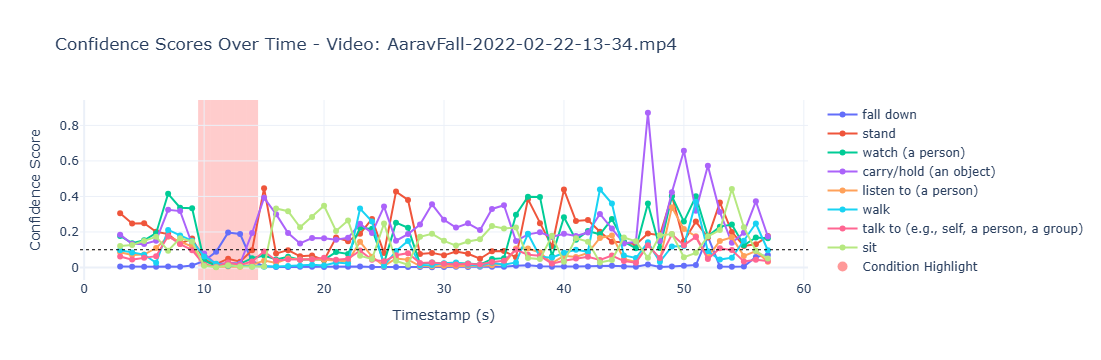

In [399]:
df = filter_max_confidence_per_timestamp(ava_classwise_prediction, class_name="fall down")
condition = {
    # "description": "Fall > 0.05 & Stand < 0.1",
    "condition": (df["fall down"] > 0.03) & (df["stand"] < 0.15) & (df["walk"] < 0.15) & 
    (df["sit"] < 0.15) & (df["talk to (e.g., self, a person, a group)"] < 0.15)
}
plot_class_confidences(df, 
                       video_name="AaravFall-2022-02-22-13-34.mp4", 
                       class_list=["fall down", 'stand', 'watch (a person)',
                                    'carry/hold (an object)','listen to (a person)', 
                                    'walk', 'talk to (e.g., self, a person, a group)', "sit"], 
                       highlight_timestamps=None,
                       threshold_lines=[0.1],
                      highlight_condition=condition)

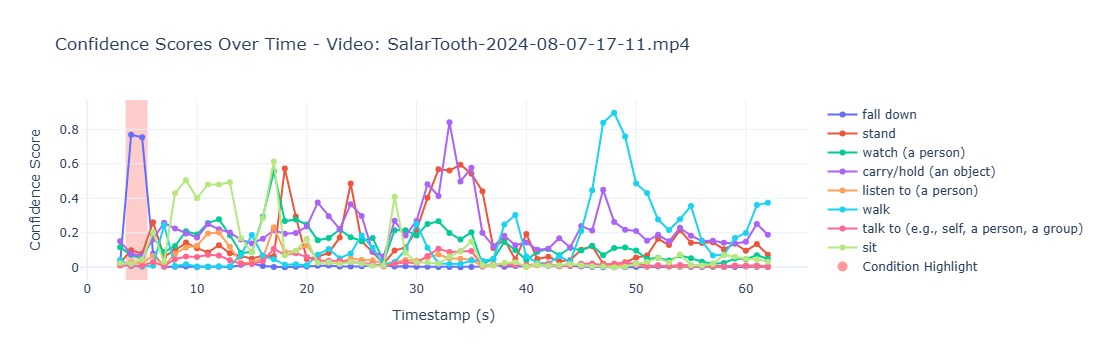

In [393]:
df = filter_max_confidence_per_timestamp(ava_classwise_prediction, class_name="fall down")
condition = {
    "condition": (df["fall down"] > 0.03) & (df["stand"] < 0.15) & (df["walk"] < 0.15) & 
    (df["sit"] < 0.15) & (df["talk to (e.g., self, a person, a group)"] < 0.15)
}
plot_class_confidences(df, 
                       video_name="SalarTooth-2024-08-07-17-11.mp4", 
                       class_list=["fall down", 'stand', 'watch (a person)',
                                    'carry/hold (an object)','listen to (a person)', 
                                    'walk', 'talk to (e.g., self, a person, a group)', "sit"], 
                       highlight_timestamps=None,
                      highlight_condition=condition)

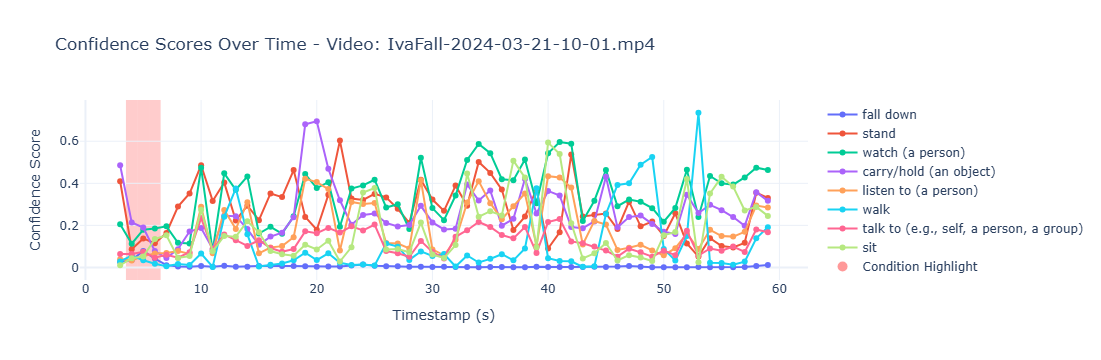

In [394]:
df = filter_max_confidence_per_timestamp(ava_classwise_prediction, class_name="fall down")
condition = {
    "condition": (df["fall down"] > 0.03) & (df["stand"] < 0.15) & (df["walk"] < 0.15) & 
    (df["sit"] < 0.15) & (df["talk to (e.g., self, a person, a group)"] < 0.15)
}
plot_class_confidences(df, 
                       video_name="IvaFall-2024-03-21-10-01.mp4", 
                       class_list=["fall down", 'stand', 'watch (a person)',
                                    'carry/hold (an object)','listen to (a person)', 
                                    'walk', 'talk to (e.g., self, a person, a group)', "sit"], 
                       highlight_timestamps=None,
                      highlight_condition=condition)

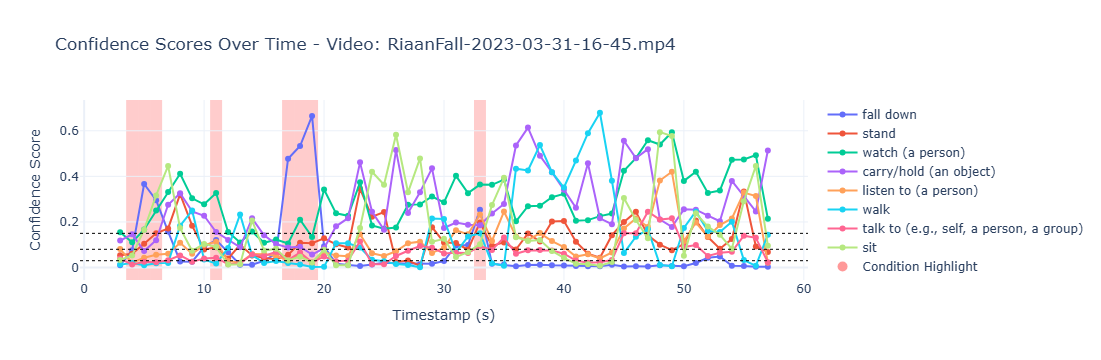

In [429]:
df = filter_max_confidence_per_timestamp(ava_classwise_prediction, class_name="fall down")
condition = {
    "condition": (df["fall down"] > 0.2) 
    | 
    ((df["fall down"] > 0.1) & (df["stand"] < 0.15) & (df["walk"] < 0.15) & 
    (df["sit"] < 0.15) & (df["talk to (e.g., self, a person, a group)"] < 0.15)) 
    | 
    ((df["fall down"] > 0.03) & (df["stand"] < 0.08) & (df["walk"] < 0.08) & 
    (df["sit"] <  0.08) & (df["talk to (e.g., self, a person, a group)"] < 0.08))
}

plot_class_confidences(df, 
                       video_name="RiaanFall-2023-03-31-16-45.mp4", 
                       class_list=["fall down", 'stand', 'watch (a person)',
                                    'carry/hold (an object)','listen to (a person)', 
                                    'walk', 'talk to (e.g., self, a person, a group)', "sit"], 
                       highlight_timestamps=None,
                       threshold_lines=[0.03, 0.08, 0.15],
                      highlight_condition=condition)

In [728]:
secaucus_labels = pd.read_csv("../data/daycare_fall/Secaucus_data/seacacus.xlsx - Sheet1.csv")
fall_labels = secaucus_labels[secaucus_labels["class"]=="fall"].reset_index(drop=True)
def extract_time_ranges_by_video(df, time_col='timestamp', video_col='video_id', max_gap=3):
    """
    Groups timestamps into time ranges where consecutive entries are no more than max_gap seconds apart,
    and returns these ranges grouped by video.

    Parameters:
        df (pd.DataFrame): DataFrame containing video and timestamp columns.
        time_col (str): Name of the timestamp column.
        video_col (str): Name of the video column.
        max_gap (int): Maximum allowed gap between timestamps in the same group.

    Returns:
        List[Dict]: A list of dictionaries with 'video_id', 'start', and 'end'.
    """
    results = []
    unique_timerange_id = 0

    for video_id, group in df.groupby(video_col):
        timestamps = sorted(group[time_col].unique())
        if not timestamps:
            continue

        start = end = timestamps[0]
        for ts in timestamps[1:]:
            if ts - end <= max_gap:
                end = ts
            else:
                results.append({'video_id': video_id, "timerange_id" : unique_timerange_id, 'start': start, 'end': end})
                unique_timerange_id += 1
                start = end = ts

        # Add last range
        results.append({'video_id': video_id, "timerange_id" : unique_timerange_id, 'start': start, 'end': end})
        unique_timerange_id += 1
        
    return results

def label_from_timeranges(df, time_ranges, video_col='video_name', time_col='timestamp'):
    """
    Labels each row in df as 1 if its video and timestamp fall within any specified time range,
    otherwise labels as 0.

    Parameters:
        df (pd.DataFrame): The target DataFrame to label.
        time_ranges (list of dict): List of dicts with keys 'video_id', 'start', 'end'.
        video_col (str): Column in df corresponding to video names.
        time_col (str): Column in df corresponding to timestamps.

    Returns:
        pd.Series: A Series of 0s and 1s for each row in df.
    """
    # Start with all zeros
    labels = pd.Series(0, index=df.index)
    event_ids = pd.Series(-1, index=df.index)

    # Build an index for fast lookup per video
    ranges_by_video = {}
    for r in time_ranges:
        ranges_by_video.setdefault(r['video_id'], []).append((r["timerange_id"], r['start'], r['end']))

    # For each video in the DataFrame
    for video_id, group_idx in df.groupby(video_col).groups.items():
        if video_id not in ranges_by_video:
            continue

        video_ranges = ranges_by_video[video_id]
        timestamps = df.loc[group_idx, time_col]

        for timerange_id, start, end in video_ranges:
            match_idx = timestamps[(timestamps >= start) & (timestamps <= end)].index
            labels.loc[match_idx] = 1
            event_ids.loc[match_idx] = timerange_id
    return labels, event_ids


In [729]:
fall_ranges = extract_time_ranges_by_video(fall_labels)
fall_ranges

[{'video_id': 'AaravFall-2022-02-22-13-34.mp4',
  'timerange_id': 0,
  'start': 10,
  'end': 11},
 {'video_id': 'Avyukt-Fall-2023-06-02-15-53.mp4',
  'timerange_id': 1,
  'start': 31,
  'end': 32},
 {'video_id': 'CrystalandKabir-2023-11-10-11-33.mp4',
  'timerange_id': 2,
  'start': 18,
  'end': 20},
 {'video_id': 'DanielleNap-2022-06-21-14-41.mp4',
  'timerange_id': 3,
  'start': 37,
  'end': 38},
 {'video_id': 'DanielleTable-2021-09-03-16-10.mp4',
  'timerange_id': 4,
  'start': 7,
  'end': 8},
 {'video_id': 'Easton-2022-08-24-16-58.mp4',
  'timerange_id': 5,
  'start': 6,
  'end': 7},
 {'video_id': 'IvaFall-2024-03-21-10-01.mp4',
  'timerange_id': 6,
  'start': 4,
  'end': 5},
 {'video_id': 'Jack-ActivityExclusion-2022-07-14-15-30.mp4',
  'timerange_id': 7,
  'start': 926,
  'end': 927},
 {'video_id': 'Jenine-gigi-2020-01-10-15-03.mp4',
  'timerange_id': 8,
  'start': 172,
  'end': 174},
 {'video_id': 'Jovan-Fall-2022-04-04-12-03.mp4',
  'timerange_id': 9,
  'start': 16,
  'end': 17

In [ ]:
# Videos detected with high conf (conf > 0.1)
video_name
RiaanFall-2023-03-31-16-45.mp4                   6   
Teachersattimeofincident-2022-08-26-17-08.mp4    6
Jenine-gigi-2020-01-10-15-03.mp4                 5
Easton-2022-08-24-16-58.mp4                      3
AaravFall-2022-02-22-13-34.mp4                   2
Jovan-Fall-2022-04-04-12-03.mp4                  2
Kelley-Car-2022-06-07-09-30.mp4                  2
Kyle-Fall-2023-03-24-09-12.mp4                   2
Mishaa-2022-08-10-11-23.mp4                      2
Avyukt-Fall-2023-06-02-15-53.mp4                 1
JudeFall-2024-01-26-09-17.mp4                    1
Mishaa-2022-08-10-11-24.mp4                      1
SalarTooth-2024-08-07-17-11.mp4                  1

# Videos Might be addable with low threshold (conf > 0.02)
video_name
Nitarasfall-2024-09-25-17-16.mp4                 4
DanielleNap-2022-06-21-14-41.mp4                 3
Kiko-2022-10-04-17-00.mp4                        3
DanielleTable-2021-09-03-16-10.mp4               2
IvaFall-2024-03-21-10-01.mp4                     2
SantaraLeiaandClairefall-2024-08-01-17-43.mp4    2
Jack-ActivityExclusion-2022-07-14-15-30.mp4      1
Kyle-2022-09-14-17-31.mp4                        1
Mishafood-2022-08-10-11-22.mp4                   1

In [803]:
ava_classwise_prediction["video_name"].unique()

array(['AaravFall-2022-02-22-13-34.mp4', 'Avyukt-Fall-2023-06-02-15-53.mp4', 'CrystalandKabir-2023-11-10-11-33.mp4', 'DanielleTable-2021-09-03-16-10.mp4', 'DanielleNap-2022-06-21-14-41.mp4', 'Easton-2022-08-24-16-58.mp4', 'IvaFall-2024-03-21-10-01.mp4', 'Jack-ActivityExclusion-2022-07-14-15-30.mp4',
       'Jenine-gigi-2020-01-10-15-03.mp4', 'Jovan-Fall-2022-04-04-12-03.mp4', 'JudeFall-2024-01-26-09-17.mp4', 'Kelley-Car-2022-06-07-09-30.mp4', 'Kiko-2022-10-04-17-00.mp4', 'Kyle-2022-09-14-17-31.mp4', 'Kyle-Fall-2023-03-24-09-12.mp4', 'Mishaa-2022-08-10-11-23.mp4', 'Mishaa-2022-08-10-11-24.mp4',
       'Mishafood-2022-08-10-11-22.mp4', 'Nitarasfall-2024-09-25-17-16.mp4', 'RiaanFall-2023-03-31-16-45.mp4', 'SalarTooth-2024-08-07-17-11.mp4', 'SantaraLeiaandClairefall-2024-08-01-17-43.mp4', 'Teachersattimeofincident-2022-08-26-17-08.mp4'], dtype=object)

In [932]:
fall_filtered_max_all_class_df = filter_max_confidence_per_timestamp(ava_classwise_prediction, class_name="fall down")

In [933]:
fall, event_ids = label_from_timeranges(fall_filtered_max_all_class_df, fall_ranges)
fall_filtered_max_all_class_df["event_ids"] = event_ids
fall_filtered_max_all_class_df["fall"] = fall

In [934]:
fall_data = fall_filtered_max_all_class_df[fall_filtered_max_all_class_df["fall"]==1]
not_fall_data = fall_filtered_max_all_class_df[(fall_filtered_max_all_class_df["video_name"].isin(fall_labels["video_id"].unique())) & (fall_filtered_max_all_class_df["fall"]==0)]

In [590]:
fall_data[["fall down", 'stand', #'watch (a person)',
        #'carry/hold (an object)','listen to (a person)', 
        'walk', 'talk to (e.g., self, a person, a group)', "sit"]].describe()

fall down      stand       walk  \
count  51.000000  51.000000  51.000000   
mean    0.084218   0.240346   0.065437   
std     0.159398   0.220122   0.063549   
min     0.002019   0.015336   0.003081   
25%     0.007721   0.072362   0.019131   
50%     0.018722   0.138193   0.041029   
75%     0.090239   0.407138   0.090235   
max     0.754335   0.711065   0.297808   

       talk to (e.g., self, a person, a group)        sit  
count                                51.000000  51.000000  
mean                                  0.063268   0.062107  
std                                   0.054939   0.064347  
min                                   0.002082   0.001444  
25%                                   0.019166   0.021006  
50%                                   0.043317   0.043535  
75%                                   0.081536   0.069829  
max                                   0.210152   0.285396

In [591]:
not_fall_data[["fall down", 'stand', #'watch (a person)',
        #'carry/hold (an object)','listen to (a person)', 
        'walk', 'talk to (e.g., self, a person, a group)', "sit"]].describe()

fall down        stand         walk  \
count  5220.000000  5220.000000  5220.000000   
mean      0.006295     0.439330     0.132794   
std       0.024673     0.212757     0.116908   
min       0.000021     0.000575     0.000001   
25%       0.001209     0.288676     0.052219   
50%       0.002141     0.476322     0.103386   
75%       0.004091     0.607422     0.174995   
max       0.769023     0.986468     0.911297   

       talk to (e.g., self, a person, a group)          sit  
count                              5220.000000  5220.000000  
mean                                  0.122928     0.087526  
std                                   0.070857     0.090746  
min                                   0.000268     0.000139  
25%                                   0.070430     0.030706  
50%                                   0.115813     0.059002  
75%                                   0.169112     0.112372  
max                                   0.449670     0.961936

In [683]:
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.tree import export_text
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Set k = number of positive (fall) samples
k = len(fall_data) * 5

# Downsample negative class
not_fall_sampled = resample(not_fall_data, n_samples=k, random_state=42)

# Combine and shuffle
balanced_df = pd.concat([fall_data, not_fall_sampled]).sample(frac=1, random_state=42).reset_index(drop=True)

# Get unique video names and split
unique_videos = balanced_df['video_name'].unique()
train_videos, test_videos = train_test_split(unique_videos, test_size=0.3, random_state=42)
print(f"train videos = {train_videos}\n")
print(f"test videos = {test_videos}\n")

# Assign rows based on video membership
train_df = balanced_df[balanced_df['video_name'].isin(train_videos)]
test_df = balanced_df[balanced_df['video_name'].isin(test_videos)]

# Prepare features and labels
feature_cols = [col for col in balanced_df.columns if col not in ['video_name', 'timestamp', 'fall']]
# feature_cols = ["fall down", 'stand', 'watch (a person)',
#         'carry/hold (an object)','listen to (a person)', 
#         'walk', 'talk to (e.g., self, a person, a group)', "sit"]
X_train = train_df[feature_cols]
y_train = train_df['fall']
X_test = test_df[feature_cols]
y_test = test_df['fall']

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

metric_records = []

models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier()
}


for name, model in models.items():
    smote_model = model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"=== {name} ===")
    print(classification_report(y_test, y_pred))
    fall_recall = y_pred[y_test==1].mean()
    fall_precison = y_test[y_pred==1].mean()
    metric_records.append({"name" : name, "fall_recall" : fall_recall, "fall_precison" : fall_precison})
    
    if name == "Decision Tree":
        tree_rules = export_text(models['Decision Tree'], feature_names=list(X_train.columns))
        print(tree_rules)

    if name == "Logistic Regression":
        log_model = model
        coef_df = pd.DataFrame({
            'feature': X_train.columns,
            'coefficient': log_model.coef_[0]
        }).sort_values(by='coefficient', key=abs, ascending=False)
        
        print(coef_df.head(10))

models = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier()
}

for name, model in models.items():
    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_test)
    print(f"=== {name} with SMOTE ===")
    print(classification_report(y_test, y_pred))
    fall_recall = y_pred[y_test==1].mean()
    fall_precison = y_test[y_pred==1].mean()
    metric_records.append({"name" : name+" with SMOTE", "fall_recall" : fall_recall, "fall_precison" : fall_precison})

    if name == "Logistic Regression":
        log_model = model
        coef_df = pd.DataFrame({
            'feature': X_train.columns,
            'coefficient': log_model.coef_[0]
        }).sort_values(by='coefficient', key=abs, ascending=False)
        
        print(coef_df.head(10))
            
    if name == "Decision Tree":
        tree_rules = export_text(models['Decision Tree'], feature_names=list(X_train.columns))
        print(tree_rules)
        # plt.figure(figsize=(20, 10))
        # plot_tree(models['Decision Tree'], feature_names=X_train.columns, class_names=['not_fall', 'fall'], filled=True)
        # plt.show()

    


metric_records = pd.DataFrame(metric_records)

train videos = ['AaravFall-2022-02-22-13-34.mp4' 'Mishaa-2022-08-10-11-23.mp4' 'CrystalandKabir-2023-11-10-11-33.mp4' 'Kiko-2022-10-04-17-00.mp4' 'IvaFall-2024-03-21-10-01.mp4' 'DanielleTable-2021-09-03-16-10.mp4' 'SantaraLeiaandClairefall-2024-08-01-17-43.mp4' 'SalarTooth-2024-08-07-17-11.mp4' 'Mishafood-2022-08-10-11-22.mp4'
 'Teachersattimeofincident-2022-08-26-17-08.mp4' 'Jovan-Fall-2022-04-04-12-03.mp4' 'RiaanFall-2023-03-31-16-45.mp4' 'Avyukt-Fall-2023-06-02-15-53.mp4' 'Kyle-2022-09-14-17-31.mp4' 'Nitarasfall-2024-09-25-17-16.mp4' 'Kelley-Car-2022-06-07-09-30.mp4']

test videos = ['Easton-2022-08-24-16-58.mp4' 'DanielleNap-2022-06-21-14-41.mp4' 'Jack-ActivityExclusion-2022-07-14-15-30.mp4' 'Jenine-gigi-2020-01-10-15-03.mp4' 'Mishaa-2022-08-10-11-24.mp4' 'Kyle-Fall-2023-03-24-09-12.mp4' 'JudeFall-2024-01-26-09-17.mp4']

=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       218
           1       0.35   

/home/sachin/.local/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning:

`BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.



In [671]:
metric_records

name  fall_recall  fall_precison
0             Logistic Regression     0.533333       0.347826
1                             SVM     0.333333       0.250000
2                   Decision Tree     0.666667       0.144928
3  Logistic Regression with SMOTE     0.533333       0.285714
4                  SVM with SMOTE     0.333333       0.250000
5        Decision Tree with SMOTE     0.600000       0.157895

In [679]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from itertools import product

metric_records = []

# Define parameter grids
log_param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear'],
    'penalty': ['l2']
}

tree_param_grid = {
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    # 'min_samples_split': [2, 5],
    # 'min_samples_leaf': [1, 2]
}

svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', "poly"],
    'gamma': ['scale', 'auto']
}

from sklearn.metrics import classification_report

# Logistic Regression
for params in product(*log_param_grid.values()):
    param_dict = dict(zip(log_param_grid.keys(), params))
    model = LogisticRegression(**param_dict)
    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_test)

    fall_recall = (y_pred[y_test == 1] == 1).mean()
    fall_precision = (y_test[y_pred == 1] == 1).mean()

    metric_records.append({
        "model_name": "LogisticRegression",
        "params": param_dict,
        "fall_recall": fall_recall,
        "fall_precision": fall_precision
    })

# Decision Tree
for params in product(*tree_param_grid.values()):
    param_dict = dict(zip(tree_param_grid.keys(), params))
    model = DecisionTreeClassifier(**param_dict)
    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_test)

    fall_recall = (y_pred[y_test == 1] == 1).mean()
    fall_precision = (y_test[y_pred == 1] == 1).mean()

    metric_records.append({
        "model_name": "DecisionTree",
        "params": param_dict,
        "fall_recall": fall_recall,
        "fall_precision": fall_precision
    })

# SVM
for params in product(*svm_param_grid.values()):
    param_dict = dict(zip(svm_param_grid.keys(), params))
    model = SVC(**param_dict)
    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_test)

    fall_recall = (y_pred[y_test == 1] == 1).mean()
    fall_precision = (y_test[y_pred == 1] == 1).mean()

    metric_records.append({
        "model_name": "SVM",
        "params": param_dict,
        "fall_recall": fall_recall,
        "fall_precision": fall_precision
    })


results_df = pd.DataFrame(metric_records)
results_df.sort_values(by=["fall_recall", "fall_precision"], ascending=False, inplace=True)


In [680]:
results_df[results_df["fall_precision"] > 0.3]

model_name                                             params  \
2   LogisticRegression   {'C': 1, 'solver': 'liblinear', 'penalty': 'l2'}   
15                 SVM      {'C': 0.1, 'kernel': 'rbf', 'gamma': 'scale'}   
19                 SVM     {'C': 1, 'kernel': 'linear', 'gamma': 'scale'}   
20                 SVM      {'C': 1, 'kernel': 'linear', 'gamma': 'auto'}   
1   LogisticRegression  {'C': 0.1, 'solver': 'liblinear', 'penalty': '...   
13                 SVM   {'C': 0.1, 'kernel': 'linear', 'gamma': 'scale'}   
14                 SVM    {'C': 0.1, 'kernel': 'linear', 'gamma': 'auto'}   
16                 SVM       {'C': 0.1, 'kernel': 'rbf', 'gamma': 'auto'}   
22                 SVM         {'C': 1, 'kernel': 'rbf', 'gamma': 'auto'}   
28                 SVM        {'C': 10, 'kernel': 'rbf', 'gamma': 'auto'}   
0   LogisticRegression  {'C': 0.01, 'solver': 'liblinear', 'penalty': ...   

    fall_recall  fall_precision  
2      0.533333        0.347826  
15     0.333333        0.384615  
19     0.333333        0.357143  
20     0.333333        0.357143  
1      0.200000        0.375000  
13     0.200000        0.375000  
14     0.200000        0.375000  
16     0.200000        0.375000  
22     0.200000        0.375000  
28     0.200000        0.375000  
0      0.066667        1.000000

In [ ]:
65+

In [1069]:
def evaluate_condition(tempdf, condition, time_extension, print_res = True):
    fall_count = sum(tempdf["fall"] == 1)
    predicted_positives, predicted_positive_ids = tempdf[condition]["fall"], tempdf[condition]["event_ids"]
    all_fall_ids = tempdf[tempdf["event_ids"]!=-1]["event_ids"].unique()
    all_predicted_fall_ids = predicted_positive_ids[predicted_positive_ids!=-1].unique()
    tp_before = sum(predicted_positives)
    if print_res:
        print(f"total data : {len(tempdf)}")
        print(f"fall data : {fall_count}")
        print(f"unique fall data : {len(all_fall_ids)}")
        print(f"non fall data : {len(tempdf)-fall_count}")
        print(f"total predicted : {len(predicted_positives)}")
        print(f"TP : {sum(predicted_positives)}")
        print(f"FP : {len(predicted_positives)-sum(predicted_positives)}")
        print(f"FN : {fall_count-sum(predicted_positives)}")
        print(f"Unique TP : {len(all_predicted_fall_ids)}")
        print(f"Unique FN : {len(all_fall_ids)-len(all_predicted_fall_ids)}")
        print(f"Precision : {round(predicted_positives.mean(), 4)}")
        print(f"FP Rate : {round((len(predicted_positives)-sum(predicted_positives))/(len(tempdf)-fall_count), 4)}")
        print(f"Recall : {round(predicted_positives.sum() / fall_count, 4)}")
        print(f"Unique Recall : {round(len(all_predicted_fall_ids) / len(all_fall_ids), 4)}")

    predicted_records = tempdf[condition]
    for idx, fall_row in tempdf[tempdf["fall"]==1].iterrows():
        timestamp = fall_row["timestamp"]
        video_specific_df = predicted_records[predicted_records["video_name"] == fall_row["video_name"]]
        video_specific_df = video_specific_df[video_specific_df["timestamp"].between(timestamp-time_extension, timestamp+time_extension)]
        predicted_records.loc[video_specific_df[video_specific_df["fall"]==0].index, "fall"] = 1
        predicted_records.loc[video_specific_df[video_specific_df["fall"]==0].index, "event_ids"] = fall_row["event_ids"]

    predicted_positives, predicted_positive_ids = predicted_records["fall"], predicted_records["event_ids"]
    if print_res:
        print(f"\nRe-evaluating after fall timestamp extention by = {time_extension}\n")

    all_predicted_fall_ids = predicted_positive_ids[predicted_positive_ids!=-1].unique()
    fall_count = fall_count+sum(predicted_positives)-tp_before
    if print_res:
        print(f"total data : {len(tempdf)}")
        print(f"fall data (+ new added TPs) : {fall_count}")
        print(f"unique fall data : {len(all_fall_ids)}")
        print(f"non fall data : {len(tempdf)-fall_count}")
        print(f"total predicted : {len(predicted_positives)}")
        print(f"TP : {sum(predicted_positives)}")
        print(f"FP : {len(predicted_positives)-sum(predicted_positives)}")
        print(f"FN : {fall_count-sum(predicted_positives)}")
        print(f"Unique TP : {len(all_predicted_fall_ids)}")
        print(f"Unique FN : {len(all_fall_ids)-len(all_predicted_fall_ids)}")
        print(f"Precision : {round(predicted_positives.mean(), 4)}")
        print(f"FP Rate : {round((len(predicted_positives)-sum(predicted_positives))/(len(tempdf)-fall_count), 4)}")
        print(f"Recall : {round(predicted_positives.sum() / fall_count, 4)}")
        print(f"Unique Recall : {round(len(all_predicted_fall_ids) / len(all_fall_ids), 4)}")

    unique_recall = round(len(all_predicted_fall_ids) / len(all_fall_ids), 4)
    fpr = round((len(predicted_positives)-sum(predicted_positives))/(len(tempdf)-fall_count), 4)
    precision = round(predicted_positives.mean(), 4)
    return predicted_positives, unique_recall, fpr, precision

In [1092]:
model = LogisticRegression(**{'C': 1, 'solver': 'liblinear', 'penalty': 'l2'})
model.fit(X_train_smote, y_train_smote)
y_pred = model.predict(X_test)

fall_recall = (y_pred[y_test == 1] == 1).mean()
fall_precision = (y_test[y_pred == 1] == 1).mean()

fall_recall, fall_precision

(0.5333333333333333, 0.34782608695652173)

In [1097]:
len(y_pred)

233

In [1105]:
time_extension = 2
predicted_records = test_df.iloc[np.where(y_pred)[0]]
for idx, fall_row in test_df[test_df["fall"]==1].iterrows():
    timestamp = fall_row["timestamp"]
    video_specific_df = predicted_records[predicted_records["video_name"] == fall_row["video_name"]]
    video_specific_df = video_specific_df[video_specific_df["timestamp"].between(timestamp-time_extension, timestamp+time_extension)]
    predicted_records.loc[video_specific_df[video_specific_df["fall"]==0].index, "fall"] = 1
    # predicted_records.loc[video_specific_df[video_specific_df["fall"]==0].index, "event_ids"] = fall_row["event_ids"]

In [1108]:
test_df["fall"].value_counts()

fall
0    218
1     15
Name: count, dtype: int64

In [1107]:
test_df.iloc[np.where(y_pred)[0]]["fall"].value_counts()

fall
0    15
1     8
Name: count, dtype: int64

In [1106]:
predicted_records["fall"].value_counts()

fall
0    13
1    10
Name: count, dtype: int64

In [1114]:
test_df.groupby("video_name")["fall"].sum()

video_name
DanielleNap-2022-06-21-14-41.mp4               2
Easton-2022-08-24-16-58.mp4                    2
Jack-ActivityExclusion-2022-07-14-15-30.mp4    2
Jenine-gigi-2020-01-10-15-03.mp4               3
JudeFall-2024-01-26-09-17.mp4                  2
Kyle-Fall-2023-03-24-09-12.mp4                 2
Mishaa-2022-08-10-11-24.mp4                    2
Name: fall, dtype: int64

In [1113]:
predicted_records.groupby("video_name")["fall"].sum()

video_name
DanielleNap-2022-06-21-14-41.mp4               3
Easton-2022-08-24-16-58.mp4                    1
Jack-ActivityExclusion-2022-07-14-15-30.mp4    1
Jenine-gigi-2020-01-10-15-03.mp4               1
JudeFall-2024-01-26-09-17.mp4                  2
Kyle-Fall-2023-03-24-09-12.mp4                 2
Name: fall, dtype: int64

In [1118]:
len(predicted_records.groupby("video_name")["fall"].sum()) , len(test_df.groupby("video_name")["fall"].sum().keys())

(6, 7)

In [1117]:
len(predicted_records.groupby("video_name")["fall"].sum()) / len(test_df.groupby("video_name")["fall"].sum().keys())

0.8571428571428571

In [1121]:
len(train_df["video_name"].unique())

16

In [981]:
coef_df = pd.DataFrame({
            'feature': X_train.columns,
            'coefficient': model.coef_[0]
        }).sort_values(by='coefficient', key=abs, ascending=False)

print(coef_df.head(10))

                   feature  coefficient
4                fall down     1.101265
10                     sit    -0.913247
13                    walk    -0.848082
16  carry/hold (an object)    -0.657849
6                jump/leap     0.396749
58       touch (an object)    -0.293563
2             crouch/kneel    -0.227060
5                   get up    -0.220534
7                lie/sleep    -0.170195
63    fight/hit (a person)     0.138211


In [994]:
# tempdf = fall_filtered_max_all_class_df[fall_filtered_max_all_class_df["video_name"]=="Jack-ActivityExclusion-2022-07-14-15-30.mp4"]
tempdf = fall_filtered_max_all_class_df
condition = (tempdf["fall down"] > 0.1)# & (tempdf["stand"] < 0.15) 
# condition = (
#     (tempdf['fall down'] > 0.02) 
#     & (tempdf['stand'] < 0.2)
#     & (tempdf['walk'] < 0.1) 
#     & (tempdf['sit'] < 0.1)
# )

predicted_positives, unique_recall, fpr, precision = evaluate_condition(tempdf, condition, time_extension=2, print_res=True)

total data : 5271
fall data : 51
unique fall data : 24
non fall data : 5220
total predicted : 50
TP : 12
FP : 38
FN : 39
Unique TP : 8
Unique FN : 16
Precision : 0.24
FP Rate : 0.0073
Recall : 0.2353
Unique Recall : 0.3333

Re-evaluating after fall timestamp extention by = 2

total data : 5271
fall data (+ new added TPs) : 62
unique fall data : 24
non fall data : 5209
total predicted : 50
TP : 23
FP : 27
FN : 39
Unique TP : 10
Unique FN : 14
Precision : 0.46
FP Rate : 0.0052
Recall : 0.371
Unique Recall : 0.4167


In [1085]:
import itertools, random
fall_thresholds = [x/1000 for x in range(1, 30)]
stand_thresholds = [x/200 for x in range(10, 50)]
sit_thresholds = [x/200 for x in range(10, 50)]
fall1_thresholds = [x/500 for x in range(1, 50)]
grid_search_combinations = list(itertools.product(fall1_thresholds, fall_thresholds, stand_thresholds, sit_thresholds))
random.shuffle(grid_search_combinations)
len(grid_search_combinations)

2273600

In [1087]:
%%time
yrecords = []
for current_idx, thresh_comb in enumerate(grid_search_combinations):
    if current_idx % 100 == 0:
        print(f"current_idx : {current_idx}, current progress : {round(100*((current_idx+1)/len(grid_search_combinations)), 2)}%")
    tempdf = fall_filtered_max_all_class_df
    condition = (tempdf["fall down"] > thresh_comb[0]) | ((tempdf["fall down"] > thresh_comb[1]) & (tempdf["stand"] < thresh_comb[2]) & (tempdf["sit"] < thresh_comb[3]))
    predicted_positives, unique_recall, fpr, precision = evaluate_condition(tempdf, condition, time_extension=2, print_res=False)
    yrecords.append({"thresh" : {"fall1" : thresh_comb[0], "fall2" : thresh_comb[1], "stand" : thresh_comb[2], "sit" : thresh_comb[3]}, "unique_recall" : unique_recall, "fpr" : fpr, "precision" : precision})
    # break

    if current_idx == 2000:
        break
        
yrecords = pd.DataFrame(yrecords).sort_values(by="unique_recall", ascending=False)

current_idx : 0, current progress : 0.0%
current_idx : 100, current progress : 0.0%
current_idx : 200, current progress : 0.01%
current_idx : 300, current progress : 0.01%
current_idx : 400, current progress : 0.02%
current_idx : 500, current progress : 0.02%
current_idx : 600, current progress : 0.03%
current_idx : 700, current progress : 0.03%
current_idx : 800, current progress : 0.04%
current_idx : 900, current progress : 0.04%
current_idx : 1000, current progress : 0.04%
current_idx : 1100, current progress : 0.05%
current_idx : 1200, current progress : 0.05%
current_idx : 1300, current progress : 0.06%
current_idx : 1400, current progress : 0.06%
current_idx : 1500, current progress : 0.07%
current_idx : 1600, current progress : 0.07%
current_idx : 1700, current progress : 0.07%
current_idx : 1800, current progress : 0.08%
current_idx : 1900, current progress : 0.08%
current_idx : 2000, current progress : 0.09%
CPU times: user 2min 37s, sys: 118 ms, total: 2min 37s
Wall time: 2mi

In [1089]:
yrecords.sort_values(by="fpr", ascending=True)[yrecords["unique_recall"] > 0.7]

/tmp/ipykernel_4032921/3893948806.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



thresh  unique_recall  \
1723  {'fall1': 0.082, 'fall2': 0.011, 'stand': 0.05...         0.7083   
470   {'fall1': 0.06, 'fall2': 0.017, 'stand': 0.06,...         0.7083   
770   {'fall1': 0.086, 'fall2': 0.02, 'stand': 0.14,...         0.7500   
465   {'fall1': 0.076, 'fall2': 0.022, 'stand': 0.12...         0.7083   
117   {'fall1': 0.082, 'fall2': 0.018, 'stand': 0.1,...         0.7083   
...                                                 ...            ...   
128   {'fall1': 0.002, 'fall2': 0.023, 'stand': 0.20...         1.0000   
287   {'fall1': 0.002, 'fall2': 0.017, 'stand': 0.17...         1.0000   
1196  {'fall1': 0.002, 'fall2': 0.004, 'stand': 0.17...         1.0000   
1976  {'fall1': 0.002, 'fall2': 0.008, 'stand': 0.1,...         1.0000   
194   {'fall1': 0.002, 'fall2': 0.001, 'stand': 0.17...         1.0000   

         fpr  precision  
1723  0.0185     0.3287  
470   0.0197     0.3200  
770   0.0200     0.3067  
465   0.0202     0.3046  
117   0.0206     0.3007  
...      ...        ...  
128   0.5205     0.0484  
287   0.5205     0.0484  
1196  0.5205     0.0484  
1976  0.5205     0.0484  
194   0.5313     0.0475  

[1738 rows x 4 columns]

In [1091]:
yrecords.loc[1723]["thresh"]

{'fall1': 0.082, 'fall2': 0.011, 'stand': 0.05, 'sit': 0.11}

In [1084]:
yrecords.sort_values(by="fpr", ascending=True)[yrecords["unique_recall"] > 0.65]

/tmp/ipykernel_4032921/1362914231.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



thresh  unique_recall     fpr  \
58      {'fall1': 0.07, 'fall2': 0.02, 'stand': 0.05}         0.6667  0.0191   
576   {'fall1': 0.068, 'fall2': 0.018, 'stand': 0.05}         0.6667  0.0193   
940    {'fall1': 0.07, 'fall2': 0.018, 'stand': 0.06}         0.6667  0.0204   
678   {'fall1': 0.07, 'fall2': 0.015, 'stand': 0.055}         0.6667  0.0216   
126   {'fall1': 0.054, 'fall2': 0.02, 'stand': 0.055}         0.6667  0.0220   
..                                                ...            ...     ...   
193   {'fall1': 0.002, 'fall2': 0.019, 'stand': 0.21}         1.0000  0.5205   
979   {'fall1': 0.002, 'fall2': 0.003, 'stand': 0.06}         1.0000  0.5205   
977   {'fall1': 0.002, 'fall2': 0.027, 'stand': 0.08}         1.0000  0.5205   
896   {'fall1': 0.002, 'fall2': 0.02, 'stand': 0.245}         1.0000  0.5205   
469  {'fall1': 0.002, 'fall2': 0.003, 'stand': 0.155}         1.0000  0.5205   

     precision  
58      0.3125  
576     0.3103  
940     0.3026  
678     0.3000  
126     0.2919  
..         ...  
193     0.0484  
979     0.0484  
977     0.0484  
896     0.0484  
469     0.0484  

[937 rows x 4 columns]

In [1056]:
yrecords[yrecords["unique_recall"] > 0.7]

thresh  unique_recall     fpr  precision
78    {'fall': 0.002, 'stand': 0.24}         0.9583  0.1610     0.0987
79   {'fall': 0.002, 'stand': 0.245}         0.9583  0.1645     0.0968
39   {'fall': 0.001, 'stand': 0.245}         0.9583  0.1909     0.0863
38    {'fall': 0.001, 'stand': 0.24}         0.9583  0.1869     0.0880
193  {'fall': 0.005, 'stand': 0.215}         0.9167  0.0944     0.1408
..                               ...            ...     ...        ...
754   {'fall': 0.019, 'stand': 0.22}         0.7083  0.0357     0.2227
755  {'fall': 0.019, 'stand': 0.225}         0.7083  0.0357     0.2227
757  {'fall': 0.019, 'stand': 0.235}         0.7083  0.0360     0.2208
758   {'fall': 0.019, 'stand': 0.24}         0.7083  0.0362     0.2199
745  {'fall': 0.019, 'stand': 0.175}         0.7083  0.0329     0.2192

[629 rows x 4 columns]

In [960]:
predicted_records = tempdf[condition]
time_limit = 3
for idx, fall_row in tempdf[tempdf["fall"]==1].iterrows():
    timestamp = fall_row["timestamp"]
    video_specific_df = predicted_records[predicted_records["video_name"] == fall_row["video_name"]]
    video_specific_df = video_specific_df[video_specific_df["timestamp"].between(timestamp-time_limit, timestamp+time_limit)]
    predicted_records.loc[video_specific_df[video_specific_df["fall"]==0].index, "fall"] = 1
    predicted_records.loc[video_specific_df[video_specific_df["fall"]==0].index, "event_ids"] = fall_row["event_ids"]
    # break

In [962]:
predicted_records["fall"].value_counts()

fall
0    102
1     48
Name: count, dtype: int64

In [963]:
tempdf[condition]["fall"].value_counts()

fall
0    133
1     17
Name: count, dtype: int64

In [966]:
predicted_records["event_ids"].value_counts()

event_ids
-1     102
 20      6
 0       5
 10      5
 11      5
 9       4
 23      4
 15      3
 3       3
 21      3
 6       2
 17      2
 19      2
 5       1
 4       1
 12      1
 18      1
Name: count, dtype: int64

In [965]:
tempdf[condition]["event_ids"].value_counts()

event_ids
-1     133
 0       2
 6       2
 10      2
 11      2
 20      2
 23      2
 3       1
 4       1
 9       1
 19      1
 21      1
Name: count, dtype: int64

In [957]:
fall_filtered_max_all_class_df[condition]["fall"].value_counts()

fall
0    133
1     17
Name: count, dtype: int64

In [907]:
predicted_records.loc[video_specific_df[video_specific_df["fall"]==0].index, "fall"] = 1

In [910]:
predicted_records.loc[video_specific_df.index]

video_name  timestamp  bend/bow (at the waist)  \
363  AaravFall-2022-02-22-13-34.mp4       10.0                 0.062899   
383  AaravFall-2022-02-22-13-34.mp4       11.0                 0.091142   
459  AaravFall-2022-02-22-13-34.mp4       12.0                 0.022451   
466  AaravFall-2022-02-22-13-34.mp4       13.0                 0.068772   

        crawl  crouch/kneel     dance  fall down    get up  jump/leap  \
363  0.004007      0.023881  0.000463   0.036680  0.081335   0.017736   
383  0.003525      0.005834  0.000114   0.088286  0.104725   0.006694   
459  0.018900      0.013374  0.000949   0.196395  0.210558   0.003275   
466  0.021642      0.019185  0.000547   0.188583  0.207014   0.003042   

     lie/sleep  ...  lift (a person)  listen to (a person)  play with kids  \
363   0.013970  ...         0.001364              0.015252        0.000144   
383   0.015241  ...         0.000489              0.004127        0.000020   
459   0.416018  ...         0.001478              0.005257        0.000233   
466   0.282094  ...         0.001126              0.003914        0.000151   

     push (another person)  sing to (e.g., self, a person, a group)  \
363               0.000592                                 0.000092   
383               0.000144                                 0.000013   
459               0.000426                                 0.000172   
466               0.000285                                 0.000064   

     take (an object) from (a person)  \
363                          0.000114   
383                          0.000011   
459                          0.000051   
466                          0.000037   

     talk to (e.g., self, a person, a group)  watch (a person)  event_ids  \
363                                 0.015326          0.038178          0   
383                                 0.004780          0.010581          0   
459                                 0.027903          0.024345         -1   
466                                 0.013392          0.020736         -1   

     fall  
363     1  
383     1  
459     1  
466     1  

[4 rows x 84 columns]

In [901]:
video_specific_df

video_name  timestamp  bend/bow (at the waist)  \
363  AaravFall-2022-02-22-13-34.mp4       10.0                 0.062899   
383  AaravFall-2022-02-22-13-34.mp4       11.0                 0.091142   
459  AaravFall-2022-02-22-13-34.mp4       12.0                 0.022451   
466  AaravFall-2022-02-22-13-34.mp4       13.0                 0.068772   

        crawl  crouch/kneel     dance  fall down    get up  jump/leap  \
363  0.004007      0.023881  0.000463   0.036680  0.081335   0.017736   
383  0.003525      0.005834  0.000114   0.088286  0.104725   0.006694   
459  0.018900      0.013374  0.000949   0.196395  0.210558   0.003275   
466  0.021642      0.019185  0.000547   0.188583  0.207014   0.003042   

     lie/sleep  ...  lift (a person)  listen to (a person)  play with kids  \
363   0.013970  ...         0.001364              0.015252        0.000144   
383   0.015241  ...         0.000489              0.004127        0.000020   
459   0.416018  ...         0.001478              0.005257        0.000233   
466   0.282094  ...         0.001126              0.003914        0.000151   

     push (another person)  sing to (e.g., self, a person, a group)  \
363               0.000592                                 0.000092   
383               0.000144                                 0.000013   
459               0.000426                                 0.000172   
466               0.000285                                 0.000064   

     take (an object) from (a person)  \
363                          0.000114   
383                          0.000011   
459                          0.000051   
466                          0.000037   

     talk to (e.g., self, a person, a group)  watch (a person)  event_ids  \
363                                 0.015326          0.038178          0   
383                                 0.004780          0.010581          0   
459                                 0.027903          0.024345         -1   
466                                 0.013392          0.020736         -1   

     fall  
363     1  
383     1  
459     0  
466     0  

[4 rows x 84 columns]

In [676]:
not_fall_data["video_name"].unique()

array(['AaravFall-2022-02-22-13-34.mp4', 'Avyukt-Fall-2023-06-02-15-53.mp4', 'CrystalandKabir-2023-11-10-11-33.mp4', 'DanielleNap-2022-06-21-14-41.mp4', 'DanielleTable-2021-09-03-16-10.mp4', 'Easton-2022-08-24-16-58.mp4', 'IvaFall-2024-03-21-10-01.mp4', 'Jack-ActivityExclusion-2022-07-14-15-30.mp4',
       'Jenine-gigi-2020-01-10-15-03.mp4', 'Jovan-Fall-2022-04-04-12-03.mp4', 'JudeFall-2024-01-26-09-17.mp4', 'Kelley-Car-2022-06-07-09-30.mp4', 'Kiko-2022-10-04-17-00.mp4', 'Kyle-2022-09-14-17-31.mp4', 'Kyle-Fall-2023-03-24-09-12.mp4', 'Mishaa-2022-08-10-11-23.mp4', 'Mishaa-2022-08-10-11-24.mp4',
       'Mishafood-2022-08-10-11-22.mp4', 'Nitarasfall-2024-09-25-17-16.mp4', 'RiaanFall-2023-03-31-16-45.mp4', 'SalarTooth-2024-08-07-17-11.mp4', 'SantaraLeiaandClairefall-2024-08-01-17-43.mp4', 'Teachersattimeofincident-2022-08-26-17-08.mp4'], dtype=object)

In [527]:
df = filter_max_confidence_per_timestamp(ava_classwise_prediction, class_name="fall down")
condition = {
    "condition": (df["fall down"] > 0.02)
    # & (df["fall down"] > df["stand"]) & (df["fall down"] > df["sit"])
    # & (df["fall down"] > df["walk"]) & (df["fall down"] > df["talk to (e.g., self, a person, a group)"]) 
    & (df["stand"] < 0.15) & (df["walk"] < 0.15) & (df["sit"] < 0.15) & (df["talk to (e.g., self, a person, a group)"] < 0.15) 
    | (df["fall down"] > 0.3) 
    # | 
    # ((df["fall down"] > 0.1) & (df["stand"] < 0.15) & (df["walk"] < 0.1) & 
    # (df["sit"] < 0.15) & (df["talk to (e.g., self, a person, a group)"] < 0.05)) 
    # | 
    # ((df["fall down"] > 0.03) & (df["stand"] < 0.08) & (df["walk"] < 0.08) & 
    # (df["sit"] <  0.08) & (df["talk to (e.g., self, a person, a group)"] < 0.08))
}


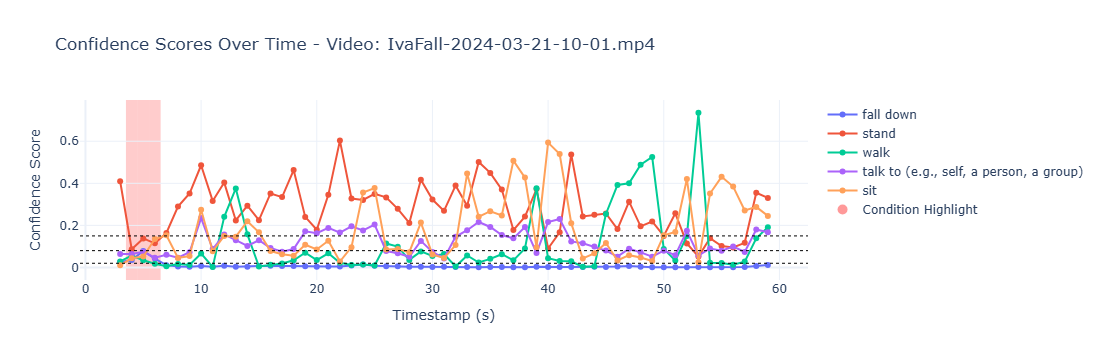

In [528]:
plot_class_confidences(df, 
                       video_name="IvaFall-2024-03-21-10-01.mp4", 
                       class_list=["fall down", 'stand', #'watch (a person)',
                                    #'carry/hold (an object)','listen to (a person)', 
                                    'walk', 'talk to (e.g., self, a person, a group)', "sit"], 
                       highlight_timestamps=None,
                       threshold_lines=[0.02, 0.08, 0.15],
                      highlight_condition=condition)

In [ ]:
import plotly.graph_objects as go
import pandas as pd

def filter_max_confidence_per_timestamp(df, class_name):
    """
    Filters the DataFrame to retain only the row with the highest confidence
    for each timestamp, based on a specified class.

    Parameters:
        df (pd.DataFrame): The full DataFrame with all class confidences.
        class_name (str): The class name to use for selecting max confidence.

    Returns:
        pd.DataFrame: Filtered DataFrame with one row per timestamp.
    """
    if class_name not in df.columns:
        raise ValueError(f"Class '{class_name}' not found in DataFrame columns.")

    # Sort by confidence descending, then drop duplicates per timestamp
    df_sorted = df.sort_values(by=[class_name], ascending=False)
    df_filtered = df_sorted.drop_duplicates(subset=["video_name", "timestamp"], keep="first")
    
    return df_filtered.sort_values(by=["video_name", "timestamp"])

In [396]:
import plotly.graph_objects as go

def plot_class_confidences(
    df, 
    video_name, 
    class_list, 
    highlight_timestamps=None, 
    threshold_lines=None,
    highlight_condition=None
):
    """
    Plots class-wise confidence scores over time for a specific video.

    Parameters:
        df (pd.DataFrame): DataFrame containing predictions.
        video_name (str): Name of the video to filter on.
        class_list (list of str): List of class names to plot.
        highlight_timestamps (list of int, optional): Timestamps to highlight with vertical lines.
        highlight_condition (dict, optional): A condition dict in the form:
            {
                "description": "Fall > 0.1 & Stand < 0.2",
                "condition": (df["fall down"] > 0.1) & (df["stand"] < 0.2)
            }
    """
    df_video = df[df['video_name'] == video_name]

    fig = go.Figure()

    # Add class confidence traces
    for class_name in class_list:
        if class_name not in df.columns:
            print(f"Warning: '{class_name}' not found in columns.")
            continue
        fig.add_trace(go.Scatter(
            x=df_video['timestamp'],
            y=df_video[class_name],
            mode='lines+markers',
            name=class_name,
            hovertemplate=(
                f"<b>Class:</b> {class_name}<br>"
                "<b>Timestamp:</b> %{x}<br>"
                "<b>Confidence:</b> %{y:.2f}<extra></extra>"
            )
        ))

    # Add vertical lines for specific timestamps
    if highlight_timestamps:
        for ts in highlight_timestamps:
            fig.add_vline(
                x=ts,
                line=dict(color="gray", width=2, dash="dot"),
                annotation_text=f"t={ts}",
                annotation_position="top right"
            )
            
    if threshold_lines:
        for threshold in threshold_lines:
            fig.add_hline(
                y=threshold,
                line=dict(color="black", width=1, dash="dot")
            )

    # Highlight zones satisfying the condition
    if highlight_condition:
        condition_mask = highlight_condition["condition"]
        df_cond = df_video[condition_mask.loc[df_video.index]]

        for i, row in df_cond.iterrows():
            fig.add_vrect(
                x0=row['timestamp'] - 0.5,
                x1=row['timestamp'] + 0.5,
                fillcolor="red",
                opacity=0.2,
                layer="below",
                line_width=0
            )
        
        # Optional: add a dummy trace to the legend to explain the highlight
        fig.add_trace(go.Scatter(
            x=[None],
            y=[None],
            mode='markers',
            marker=dict(size=10, color='red', opacity=0.4),
            name=highlight_condition.get("description", "Condition Highlight")
        ))
        
    fig.update_layout(
        title=f"Confidence Scores Over Time - Video: {video_name}",
        xaxis_title="Timestamp (s)",
        yaxis_title="Confidence Score",
        hovermode="x unified",
        template="plotly_white"
    )

    fig.show()


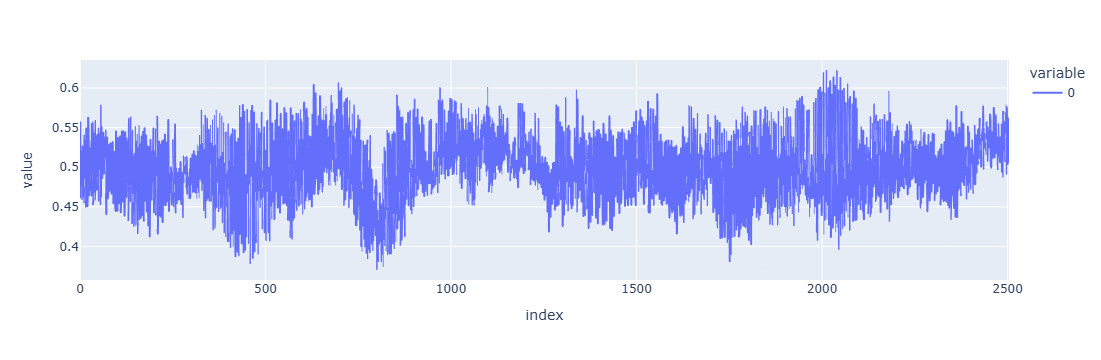

In [29]:
px.line(results_df["fall_action_prob"].tolist())

In [80]:
len(frame_buffer), frame_buffer[0].shape

(32, (720, 1280, 3))

In [81]:
len(clip_buffer), clip_buffer[0].shape

(32, (224, 398, 3))

In [82]:
len(inputs)

2

In [83]:
inputs[0].shape, inputs[1].shape

(torch.Size([1, 3, 8, 224, 398]), torch.Size([1, 3, 32, 224, 398]))

In [90]:
from slowfast.datasets.utils import pack_pathway_output, tensor_normalize

In [91]:

def process_cv2_inputs(frames, cfg):
    """
    Normalize and prepare inputs as a list of tensors. Each tensor
    correspond to a unique pathway.
    Args:
        frames (list of array): list of input images (correspond to one clip) in range [0, 255].
        cfg (CfgNode): configs. Details can be found in
            slowfast/config/defaults.py
    """
    inputs = torch.from_numpy(np.array(frames)).float() / 255
    inputs = tensor_normalize(inputs, cfg.DATA.MEAN, cfg.DATA.STD)
    # T H W C -> C T H W.
    inputs = inputs.permute(3, 0, 1, 2)
    # Sample frames for num_frames specified.
    index = torch.linspace(0, inputs.shape[1] - 1, cfg.DATA.NUM_FRAMES).long()
    inputs = torch.index_select(inputs, 1, index)
    inputs = pack_pathway_output(cfg, inputs)
    inputs = [inp.unsqueeze(0) for inp in inputs]
    return inputs

In [96]:
frames = clip_buffer

In [97]:
inputs = torch.from_numpy(np.array(frames)).float() / 255

In [99]:
inputs.shape

torch.Size([32, 224, 398, 3])

In [100]:
inputs = tensor_normalize(inputs, cfg.DATA.MEAN, cfg.DATA.STD)

In [101]:
inputs.shape

torch.Size([32, 224, 398, 3])

In [103]:
inputs = inputs.permute(3, 0, 1, 2)
inputs.shape

torch.Size([3, 32, 224, 398])

In [104]:
index = torch.linspace(0, inputs.shape[1] - 1, cfg.DATA.NUM_FRAMES).long()

In [105]:
index

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [108]:
inputs = torch.index_select(inputs, 1, index)

In [111]:
inputs = pack_pathway_output(cfg, inputs)

In [116]:
inputs[0].shape, inputs[1].shape

(torch.Size([3, 8, 224, 398]), torch.Size([3, 32, 224, 398]))

In [46]:
box_inputs.shape

torch.Size([5, 5])

In [37]:
preds.shape

(6, 9)

In [34]:
action_class_list

['fall',
 'standing',
 'sitting',
 'walking',
 'crawling',
 'sleeping',
 'eating',
 'jumping',
 'others']

In [35]:
preds[1]

array([    0.67169,     0.25268,   0.0065606,   0.0039144,  2.0936e-09,    0.014328,  2.2559e-05,    0.026724,   0.0091268], dtype=float32)

In [33]:
writer.release()

In [26]:
cfg.DATA.NUM_FRAMES

32

In [14]:
pwd

'/workdir/sachin/temp_analysis/SlowFast_Pipelines/slowfast'